# Import Required Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report

import statsmodels.api as sm

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 100)

# Load Data

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Dataset Describe

In [3]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.duplicated().sum()

0

# Data Pre-Processing

In [6]:
#Prospect ID
df['Prospect ID'].nunique()

9240

In [7]:
# Lead Number
df['Lead Number'].nunique()

9240

In [8]:
ref_id = df[['Prospect ID','Lead Number']]
df = df.drop(['Prospect ID'], 1)
df = df.set_index('Lead Number')

##  Numberical Columns

In [9]:
int_col = df.select_dtypes(include=['float64']).columns
int_col = int_col.insert(0, 'Total Time Spent on Website')
int_col

Index(['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

### Univariate for Numberical Columns

In [10]:
for col in int_col:
    print(col,"Missing value:", df[col].isnull().mean()*100)

Total Time Spent on Website Missing value: 0.0
TotalVisits Missing value: 1.4826839826839828
Page Views Per Visit Missing value: 1.4826839826839828
Asymmetrique Activity Score Missing value: 45.64935064935065
Asymmetrique Profile Score Missing value: 45.64935064935065


In [11]:
missing_data = df[df['TotalVisits'].isnull()]
missing_data['Converted'].value_counts()

1    100
0     37
Name: Converted, dtype: int64

In [12]:
for col in missing_data.columns:
    print(missing_data[col].value_counts())

Lead Add Form     110
Lead Import        24
API                 2
Quick Add Form      1
Name: Lead Origin, dtype: int64
Reference           91
Facebook            24
Welingak Website    13
Olark Chat           2
Name: Lead Source, dtype: int64
No     127
Yes     10
Name: Do Not Email, dtype: int64
No    137
Name: Do Not Call, dtype: int64
1    100
0     37
Name: Converted, dtype: int64
Series([], Name: TotalVisits, dtype: int64)
417     2
266     2
289     2
1427    2
1212    2
       ..
158     1
1186    1
1378    1
177     1
1525    1
Name: Total Time Spent on Website, Length: 131, dtype: int64
Series([], Name: Page Views Per Visit, dtype: int64)
Email Bounced               14
SMS Sent                     7
Had a Phone Conversation     5
Approached upfront           4
Unreachable                  3
Olark Chat Conversation      1
Name: Last Activity, dtype: int64
Series([], Name: Country, dtype: int64)
Select                               69
Marketing Management                 14
Fin

#### TotalVisits & Page Views Per Visit
In place of drop the missing rows we impute as 0 (Zero). Might be user not visited.

In [13]:
df['TotalVisits'] = df['TotalVisits'].fillna(0)
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(0)

#### Asymmetrique Activity Score & Asymmetrique Profile Score



In [14]:
df[['Asymmetrique Activity Score', 'Asymmetrique Profile Score','Asymmetrique Activity Index', 'Asymmetrique Profile Index']].describe(include= 'all')

,Asymmetrique Activity Score,Asymmetrique Profile Score,Asymmetrique Activity Index,Asymmetrique Profile Index
count,5022.000000,5022.000000,5022,5022
unique,NaN,NaN,3,3
top,NaN,NaN,02.Medium,02.Medium
freq,NaN,NaN,3839,2788
mean,14.306252,16.344883,NaN,NaN
std,1.386694,1.811395,NaN,NaN
min,7.000000,11.000000,NaN,NaN
25%,14.000000,15.000000,NaN,NaN
50%,14.000000,16.000000,NaN,NaN
75%,15.000000,18.000000,NaN,NaN


45% data is missing in All 4 columns('Asymmetrique Activity Score', 'Asymmetrique Profile Score','Asymmetrique Activity Index', 'Asymmetrique Profile Index')
so we set zero (0) for numerical columns and will set Others for categorical Columns

In [15]:
df['Asymmetrique Activity Score'] = df['Asymmetrique Activity Score'].fillna(0)
df['Asymmetrique Profile Score'] = df['Asymmetrique Profile Score'].fillna(0)

### Outliers Check

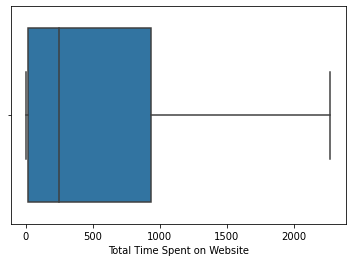

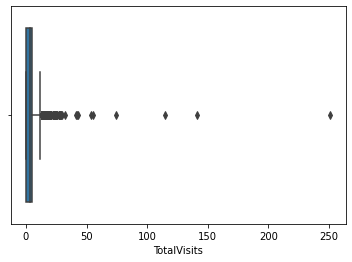

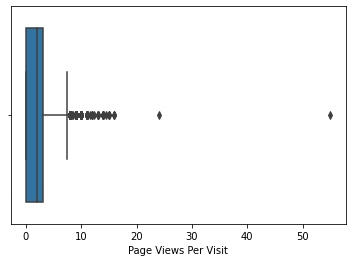

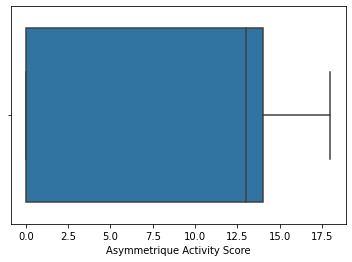

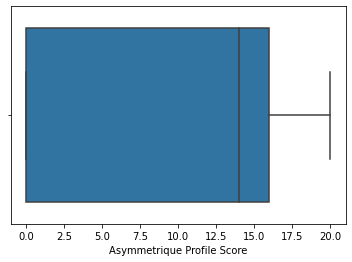

In [16]:
for col in int_col:
    sns.boxplot(df[col])
    plt.show()

* <b> TotalVisits & Page Views Per Visit these 2 columns has outliers but will see leter on.
* <b> Asymmetrique Activity Score, Asymmetrique Profile Score After impute missing value with zero(0) cols got imbalanced, If this columns will effect model then will drop the columns during model building 

## Categorical Columns

In [17]:
cat_df_col = df.select_dtypes(include=['object']).columns
cat_df = df.select_dtypes(include=['object'])
cat_df_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9204 non-null   object
 2   Do Not Email                                   9240 non-null   object
 3   Do Not Call                                    9240 non-null   object
 4   Last Activity                                  9137 non-null   object
 5   Country                                        6779 non-null   object
 6   Specialization                                 7802 non-null   object
 7   How did you hear about X Education             7033 non-null   object
 8   What is your current occupation                6550 non-null   object
 9   What matters most to you in choosing a course  6531 non-

## Missing Value Check in cat columns

In [19]:
cat_df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.0000

In [20]:
for cat in cat_df_col:
    print(df[cat].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page V

# Data Visualization 

## Count Plot

In [21]:
def cntplt(var):
    ax = sns.countplot(x=var, data = df)
    plt.title(f'Distribution of {var}')
    plt.ylabel('Total Count')
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()) , (p.get_x()+0.5, p.get_height()+2000), 
                    ha="center")

* <b> Indicating whether the customer had seen the ad in any of the listed items.

Search                   0.0
Magazine                 0.0
Newspaper Article        0.0
X Education Forums       0.0
Newspaper                0.0
Digital Advertisement    0.0
dtype: float64
Value Counts: 
 No     9226
Yes      14
Name: Search, dtype: int64


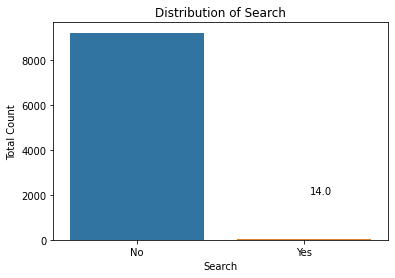

Value Counts: 
 No    9240
Name: Magazine, dtype: int64


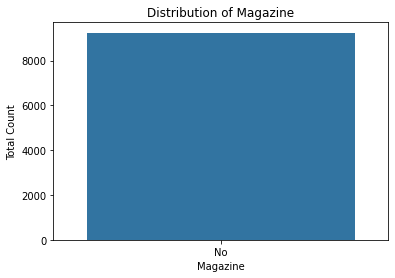

Value Counts: 
 No     9238
Yes       2
Name: Newspaper Article, dtype: int64


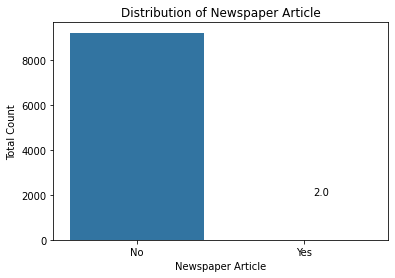

Value Counts: 
 No     9239
Yes       1
Name: X Education Forums, dtype: int64


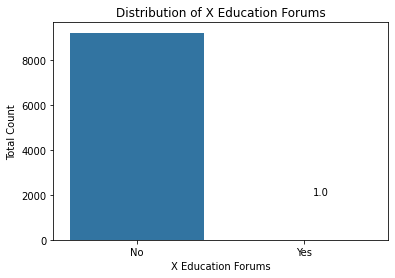

Value Counts: 
 No     9239
Yes       1
Name: Newspaper, dtype: int64


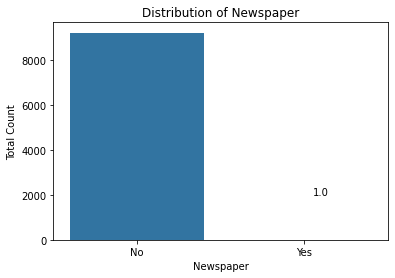

Value Counts: 
 No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


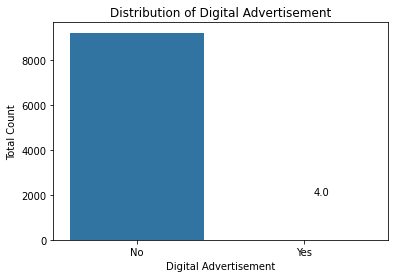

In [22]:
ad_seen = ["Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement"]
print(df[ad_seen].isnull().mean()*100)
for cat in ad_seen:
    print("Value Counts:","\n" , df[cat].value_counts())
    cntplt(cat)
    plt.show()


'Do Not Call', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
       'Get updates on DM Content', 'I agree to pay the amount through cheque'

Do Not Call                                 0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
dtype: float64


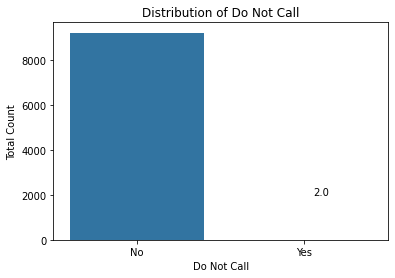

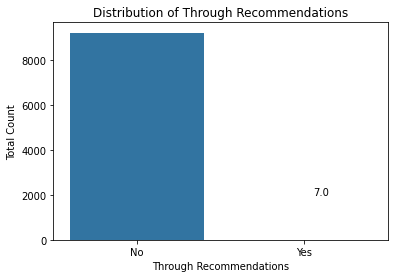

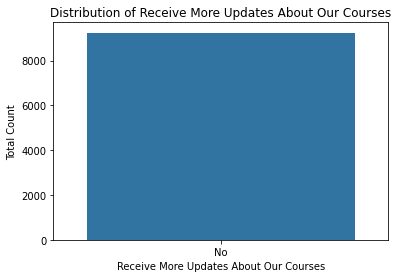

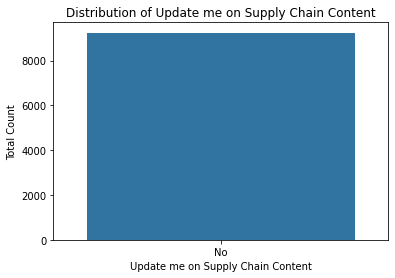

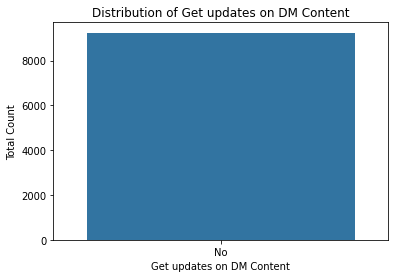

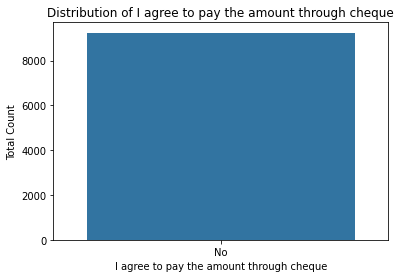

In [23]:
lst1= ['Do Not Call', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
       'Get updates on DM Content', 'I agree to pay the amount through cheque']

print(df[lst1].isnull().mean()*100)
for cat in lst1:
    cntplt(cat)
    plt.show()

"Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", 'Do Not Call', 
'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
'Get updates on DM Content', 'I agree to pay the amount through cheque'

* On the above columns most the value(99%) of the values are No so we drop these columns.


In [24]:
drop_lst = ["Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", 'Do Not Call', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
df = df.drop(drop_lst, axis=1)

cat_df_col = cat_df_col.drop(drop_lst)

#### Target Varible 

In [25]:
#Converted
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

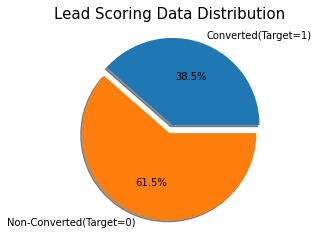

In [26]:
x= ['Converted(Target=1)', 'Non-Converted(Target=0)']
y= [len(df[df['Converted']==1]), len(df[df['Converted']==0])]
plt.pie(y, data= df.Converted, labels=x, autopct='%1.1f%%', shadow=True, explode= (0.1, 0))
plt.title('Lead Scoring Data Distribution', fontdict={'fontsize':15})
plt.show()

* <b> This is Balanced Data, Around 38.5% of customers is converted, and the remaining 61.5% of customers is not converted.

#### Lead Source (Case sensitive info is there - "Google & google")

In [27]:
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Specialization, How did you hear about X Education, Lead Profile, City
* These columns have "Select" Value so we treating as missing value  


In [28]:
df['Specialization'] = df['Specialization'].replace('Select',np.nan)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select',np.nan)
df['Lead Profile'] = df['Lead Profile'].replace('Select',np.nan)
df['City'] = df['City'].replace('Select',np.nan)


In [29]:
cat_df_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Bivariate Analysis with Target Variable 

In [30]:
def b_cntplot(var, target):
    plt.figure(figsize=(20,6))
    ax=sns.countplot(data=df, x=var, hue=target)
    plt.title(f'Distribution of {var} vs {target}')
    plt.ylabel('Total Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df)) , (p.get_x()+0.2, p.get_height()), 
                    ha="center")


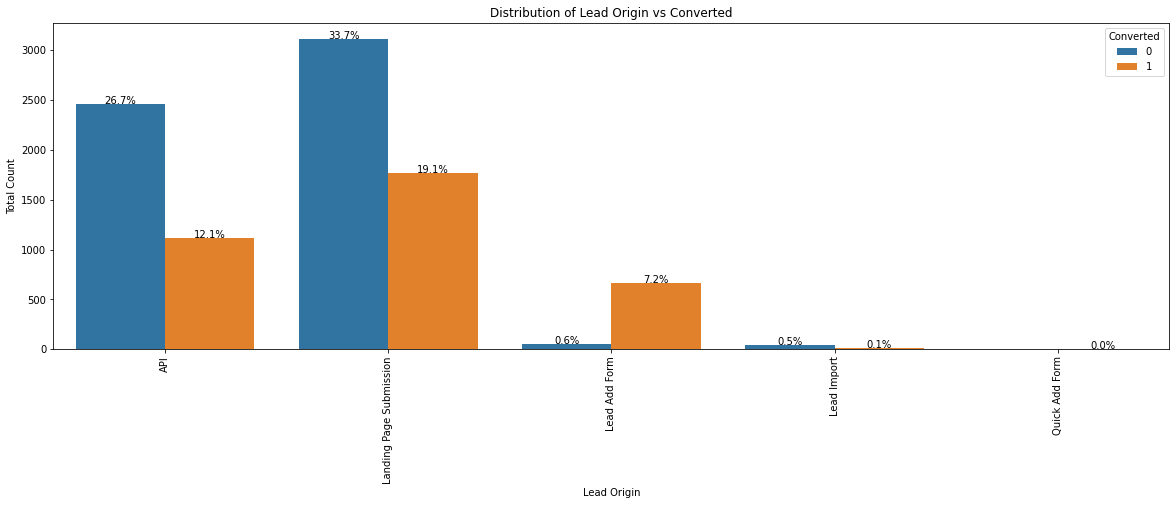

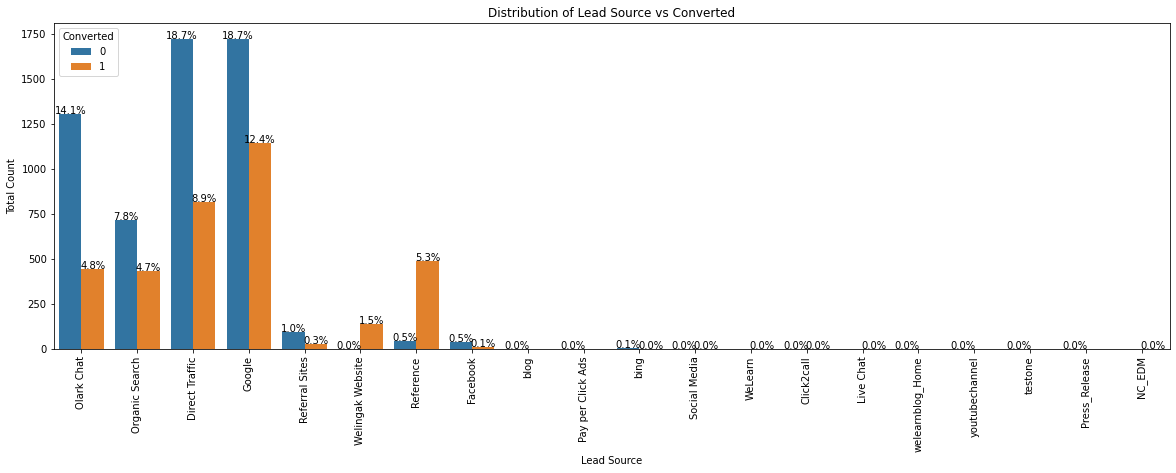

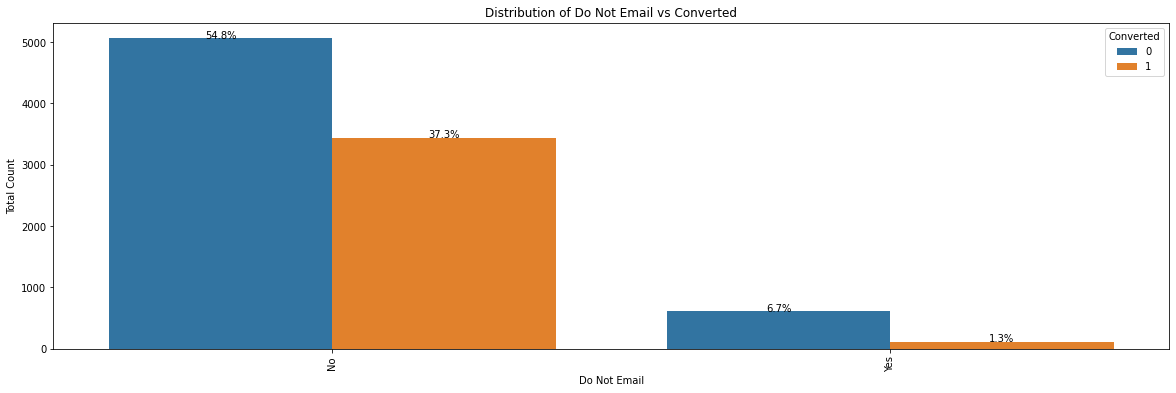

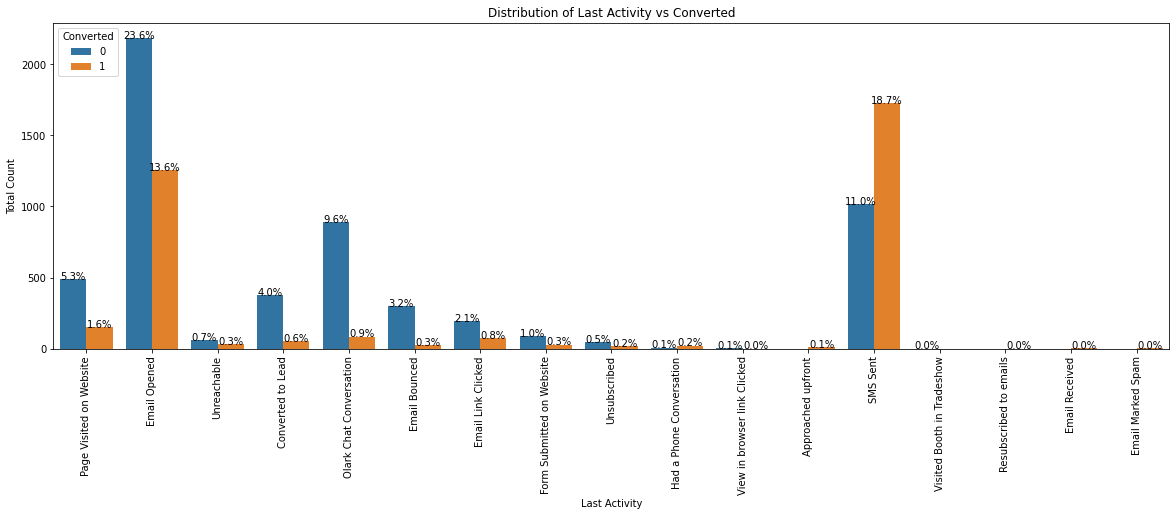

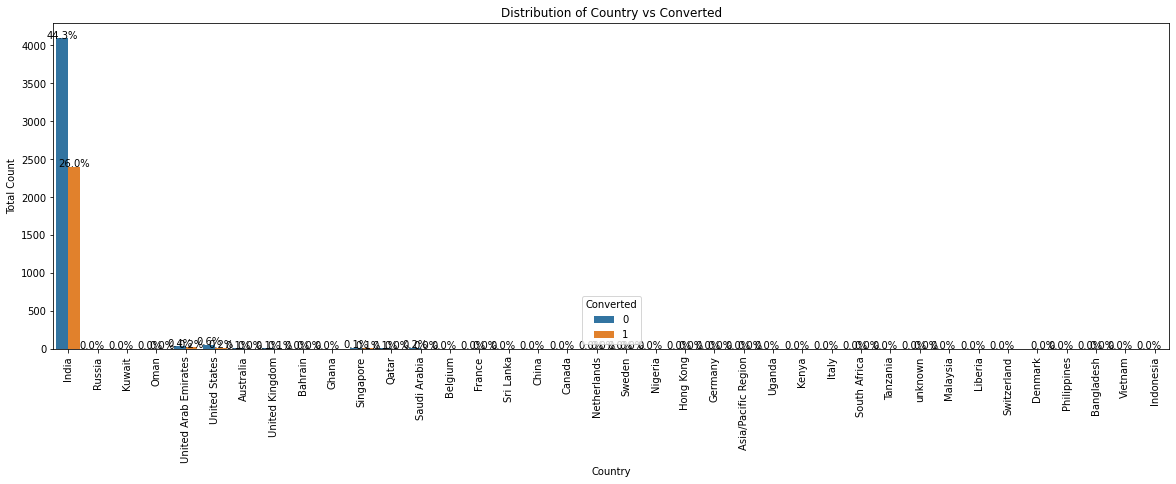

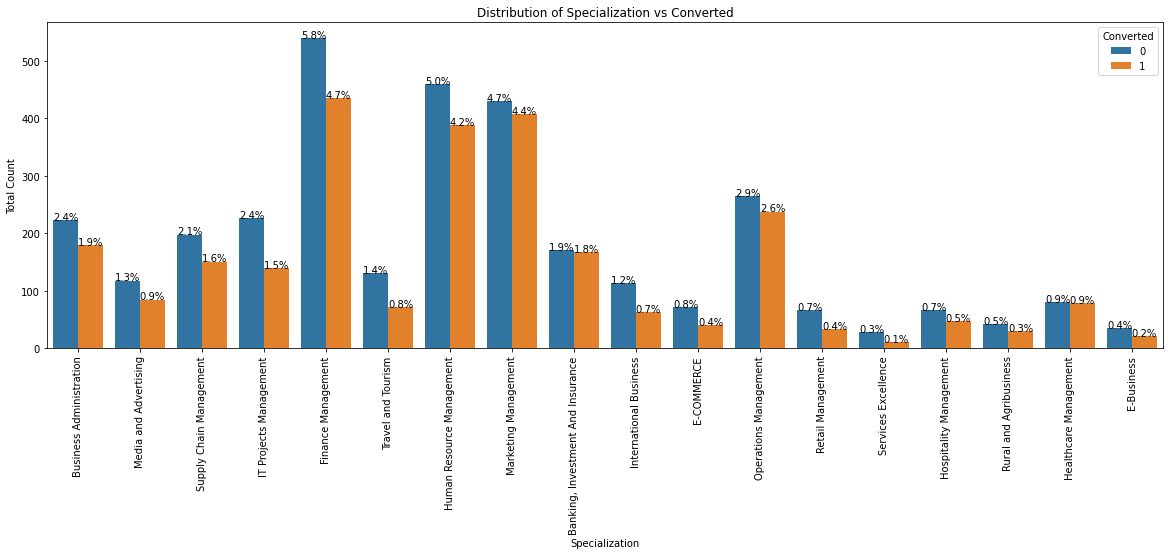

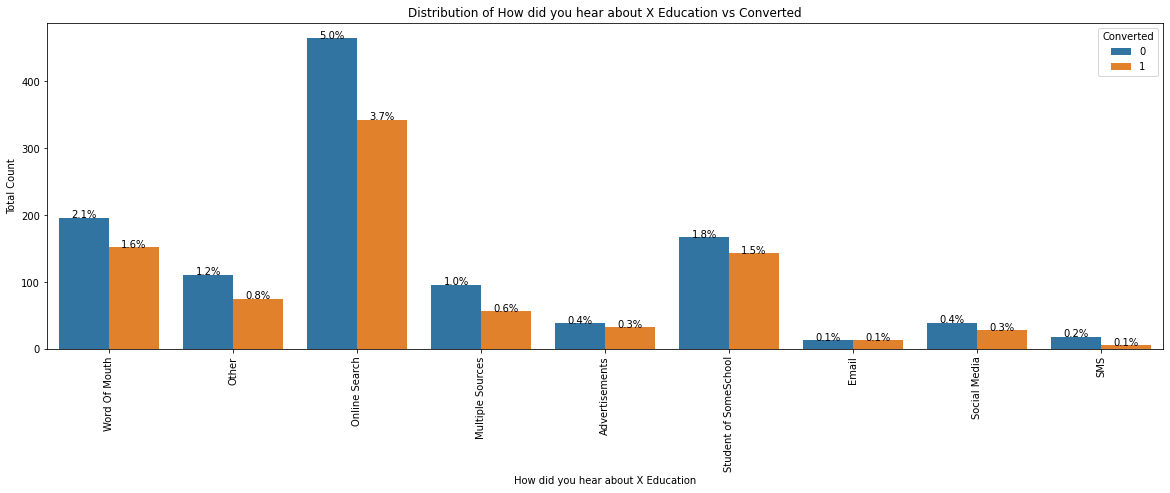

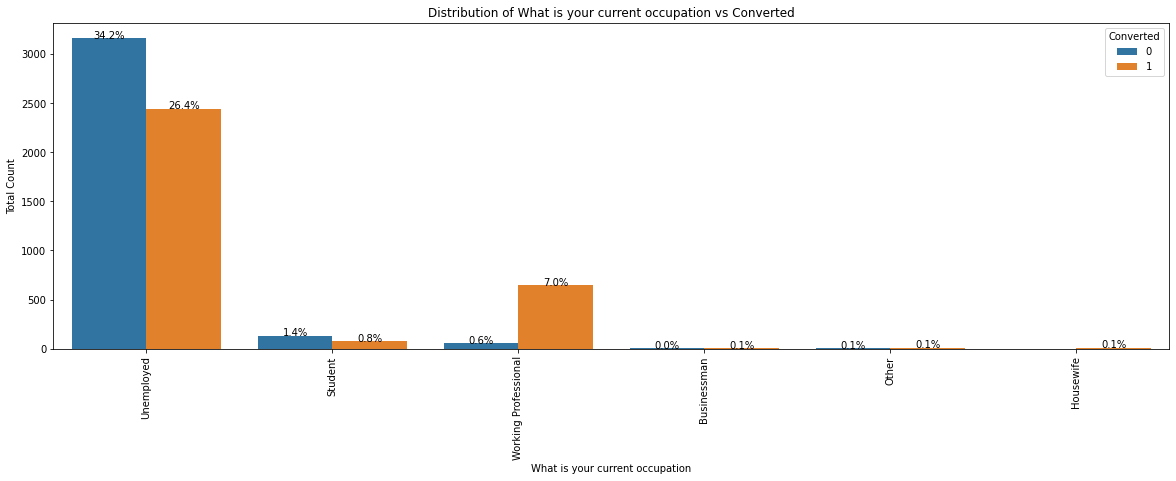

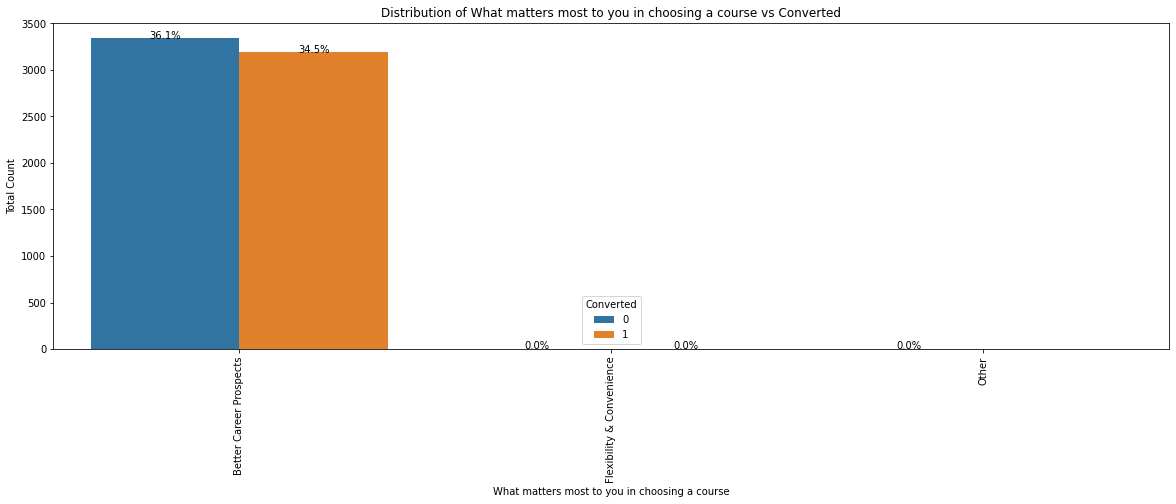

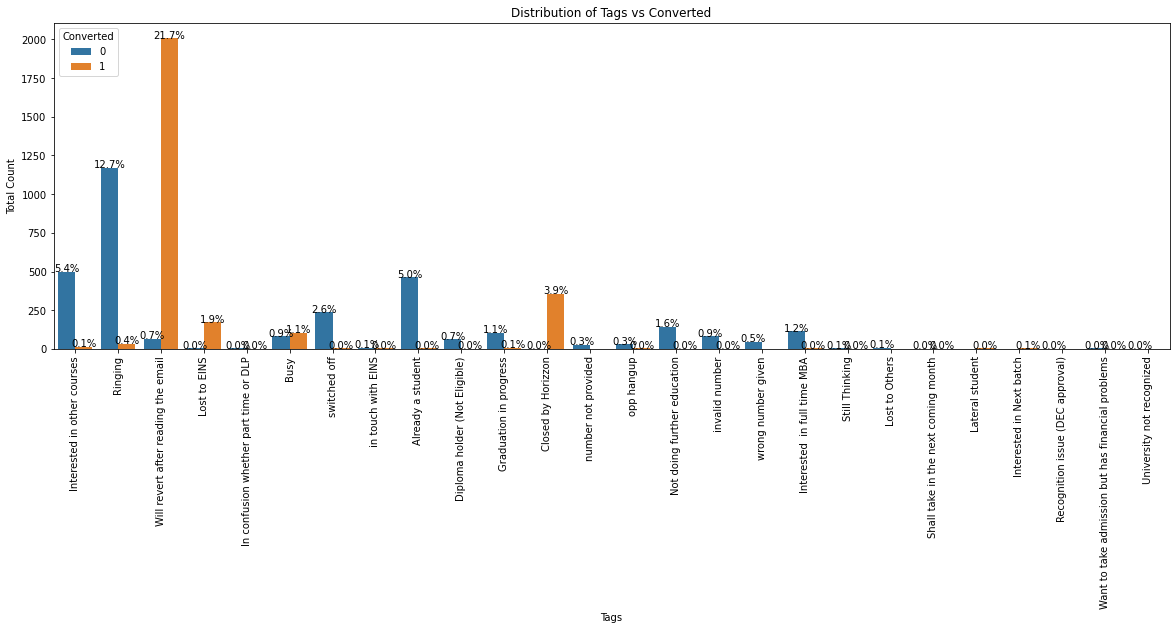

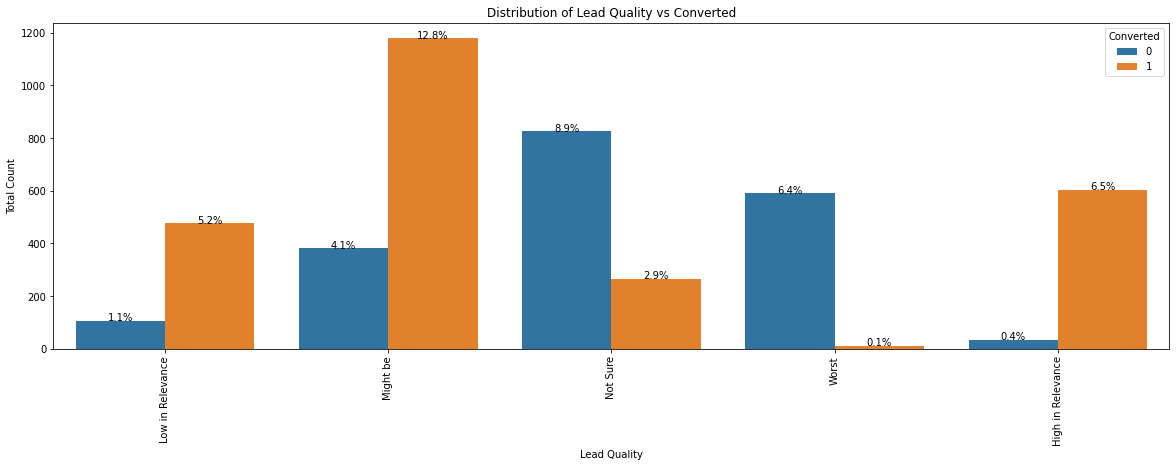

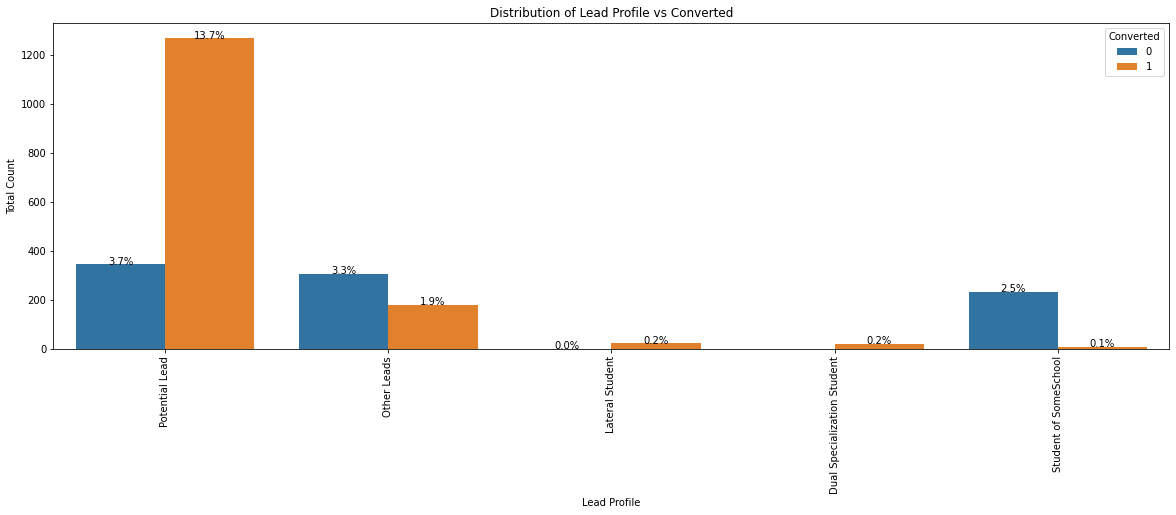

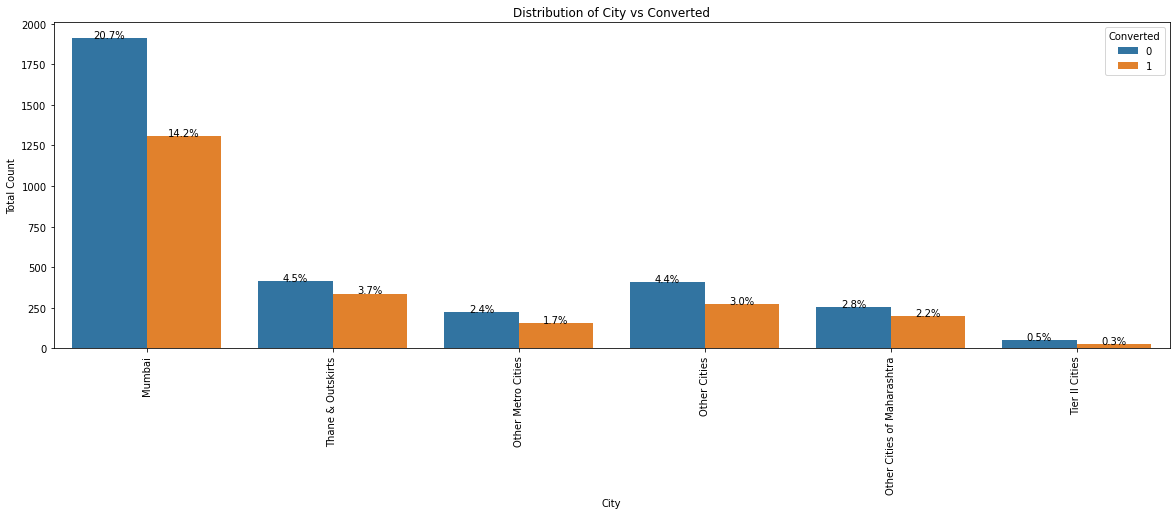

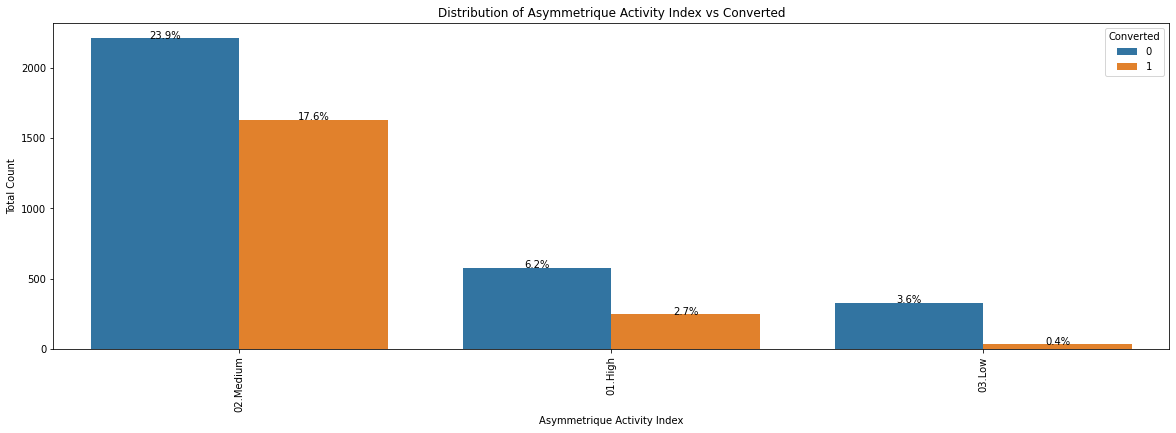

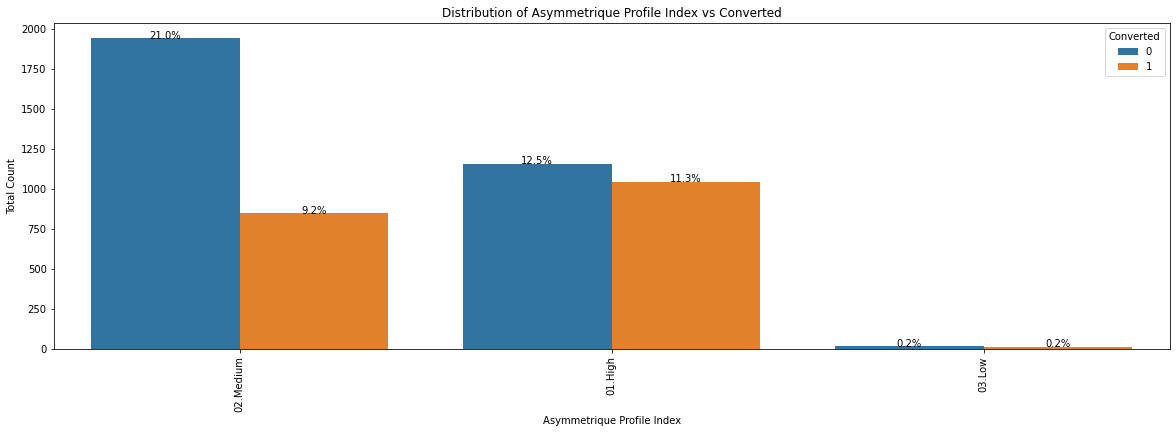

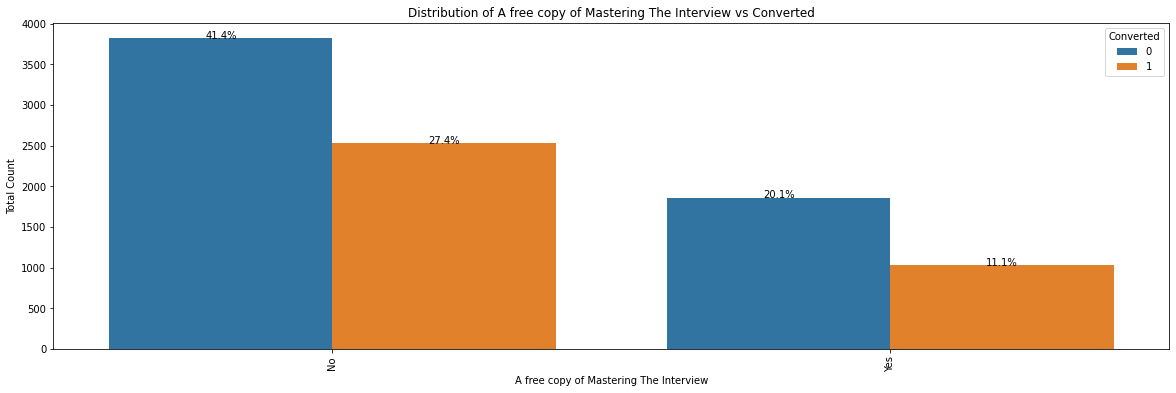

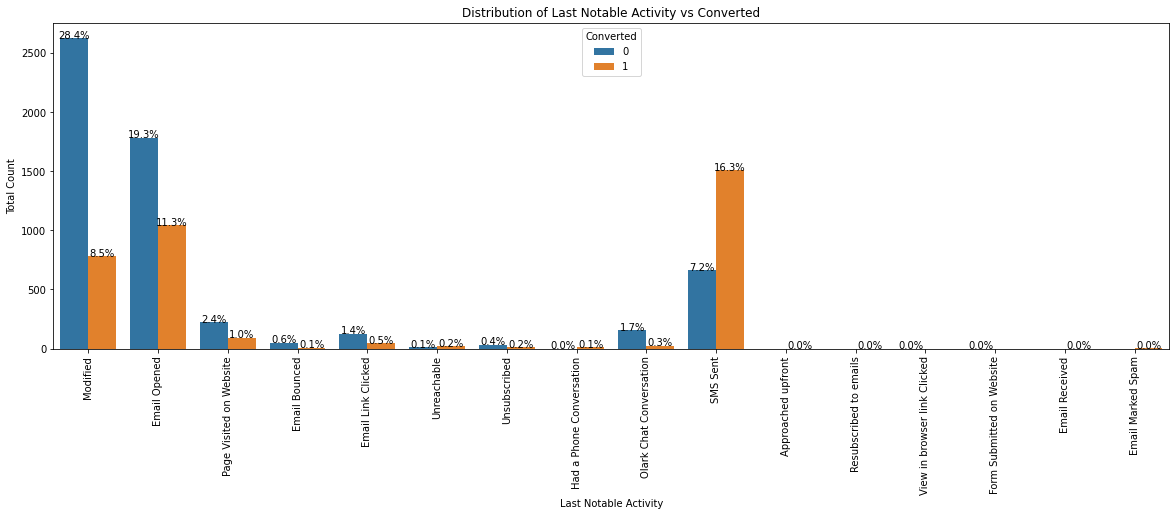

In [31]:
for c in cat_df_col:
    b_cntplot(c, 'Converted')
    plt.show()

# Feature Engineering

## Dummy Variable Creation

In [32]:
def dummy_fun(col, max_dummy):
    #dummy_data = pd.DataFrame()
    dummy_var = {}
    
    dummy_var[col] = list()
    freqs = df[col].value_counts()
    #print(freqs)
    cat_cols = freqs.index[:-1]
    #print(col , ":=", cat_cols)
    if len(cat_cols)> max_dummy:
        for cat in cat_cols[0:max_dummy]:
            #print(cat)
            dummy_var[col].append(cat)
            #print(dummy_var)
            name= col+'_'+cat
            #print(name)
            #print((df[col]==cat).astype(int))
            #print(df)   
            df[name] = (df[col]==cat).astype(int)
             
        dummy_var[col].append('Others')
        other_col = col+'_'+'Others'
        #print(other_col)
        df[other_col] = df[col].isin(cat_cols[max_dummy:]).astype(int)
        del df[col]
    


### Lead Origin

In [33]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

* <b> Keeping the top 2 and merging the remaining as others

In [34]:
dummy_fun('Lead Origin', 3)

### Lead Source

In [35]:
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

* <b> Keeping the top 4 and merging the remaining as others

In [36]:
dummy_fun('Lead Source', 4)

### Last Activity

In [37]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

* <b> Keeping the top 5 and merging the remaining as others

In [38]:
dummy_fun('Last Activity', 4)

### Country & City

In [39]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [40]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [41]:
df[df['Country'] == 'United States'][['Country', 'City']]

,Country,City
Lead Number,,
657902,United States,Mumbai
657313,United States,NaN
656072,United States,Other Metro Cities
655382,United States,NaN
655061,United States,Thane & Outskirts
653415,United States,Mumbai
648033,United States,NaN
647320,United States,Other Cities
643158,United States,NaN


In [42]:
df[df['Country'] == 'United Arab Emirates'][['Country', 'City']]

,Country,City
Lead Number,,
658288,United Arab Emirates,NaN
653858,United Arab Emirates,NaN
652104,United Arab Emirates,Mumbai
649919,United Arab Emirates,NaN
649442,United Arab Emirates,Other Cities of Maharashtra
649329,United Arab Emirates,Other Cities
647814,United Arab Emirates,Other Cities
643169,United Arab Emirates,Mumbai
637395,United Arab Emirates,Mumbai


<b> As per the data we can say that customers filled wrong information. During Model Building if I feel Column is not useful then will drop the columns. 
* So over come this issue will keep only one country "India", "US", and remaining as others
    * and City Mumbai and others

In [43]:
dummy_fun('Country', 2)
dummy_fun('City', 2)

### Specialization

In [44]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [45]:
dummy_fun('Specialization', 9)

### How did you hear about X Education

In [46]:
df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [47]:
dummy_fun('How did you hear about X Education', 4)

### What is your current occupation

In [48]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [49]:
dummy_fun('What is your current occupation', 4)

### Tags


In [50]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [51]:
dummy_fun('Tags', 5)

### Lead Profile

In [52]:
df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [53]:
dummy_fun('Lead Profile', 3)

###  Last Notable Activity


In [54]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [55]:
dummy_fun('Last Notable Activity', 4)

### Lead Quality


In [56]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [57]:
dummy_fun('Lead Quality', 3)

Below Columns are pending for Dummy variable creation so we use get dummy function

In [58]:
df.select_dtypes(include=['object']).columns

Index(['Do Not Email', 'What matters most to you in choosing a course',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [59]:
df = pd.get_dummies(df, drop_first=True)

# Final Missing Value Checks

In [60]:
df.isnull().mean()

Converted                                                                  0.0
TotalVisits                                                                0.0
Total Time Spent on Website                                                0.0
Page Views Per Visit                                                       0.0
Asymmetrique Activity Score                                                0.0
Asymmetrique Profile Score                                                 0.0
Lead Origin_Landing Page Submission                                        0.0
Lead Origin_API                                                            0.0
Lead Origin_Lead Add Form                                                  0.0
Lead Origin_Others                                                         0.0
Lead Source_Google                                                         0.0
Lead Source_Direct Traffic                                                 0.0
Lead Source_Olark Chat                              

In [61]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Email Opened,Last Activity_SMS Sent,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Others,Country_India,Country_United States,Country_Others,City_Mumbai,City_Thane & Outskirts,City_Others,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Business Administration,Specialization_IT Projects Management,Specialization_Supply Chain Management,"Specialization_Banking, Investment And Insurance",Specialization_Travel and Tourism,Specialization_Others,How did you hear about X Education_Online Search,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Other,How did you hear about X Education_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_Student,What is your current occupation_Other,What is your current occupation_Others,Tags_Will revert after reading the email,Tags_Ringing,Tags_Interested in other courses,Tags_Already a student,Tags_Closed by Horizzon,Tags_Others,Lead Profile_Potential Lead,Lead Profile_Other Leads,Lead Profile_Student of SomeSchool,Lead Profile_Others,Last Notable Activity_Modified,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,Last Notable Activity_Page Visited on Website,Last Notable Activity_Others,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_High in Relevance,Lead Quality_Others,Do Not Email_Yes,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,15.0,15.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
660728,0,5.0,674,2.5,15.0,15.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
660727,1,2.0,1532,2.0,14.0,20.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
660719,0,1.0,305,1.0,13.0,17.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
660681,1,2.0,1428,1.0,15.0,18.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [62]:
df.shape

(9240, 73)

# Correlation Plot

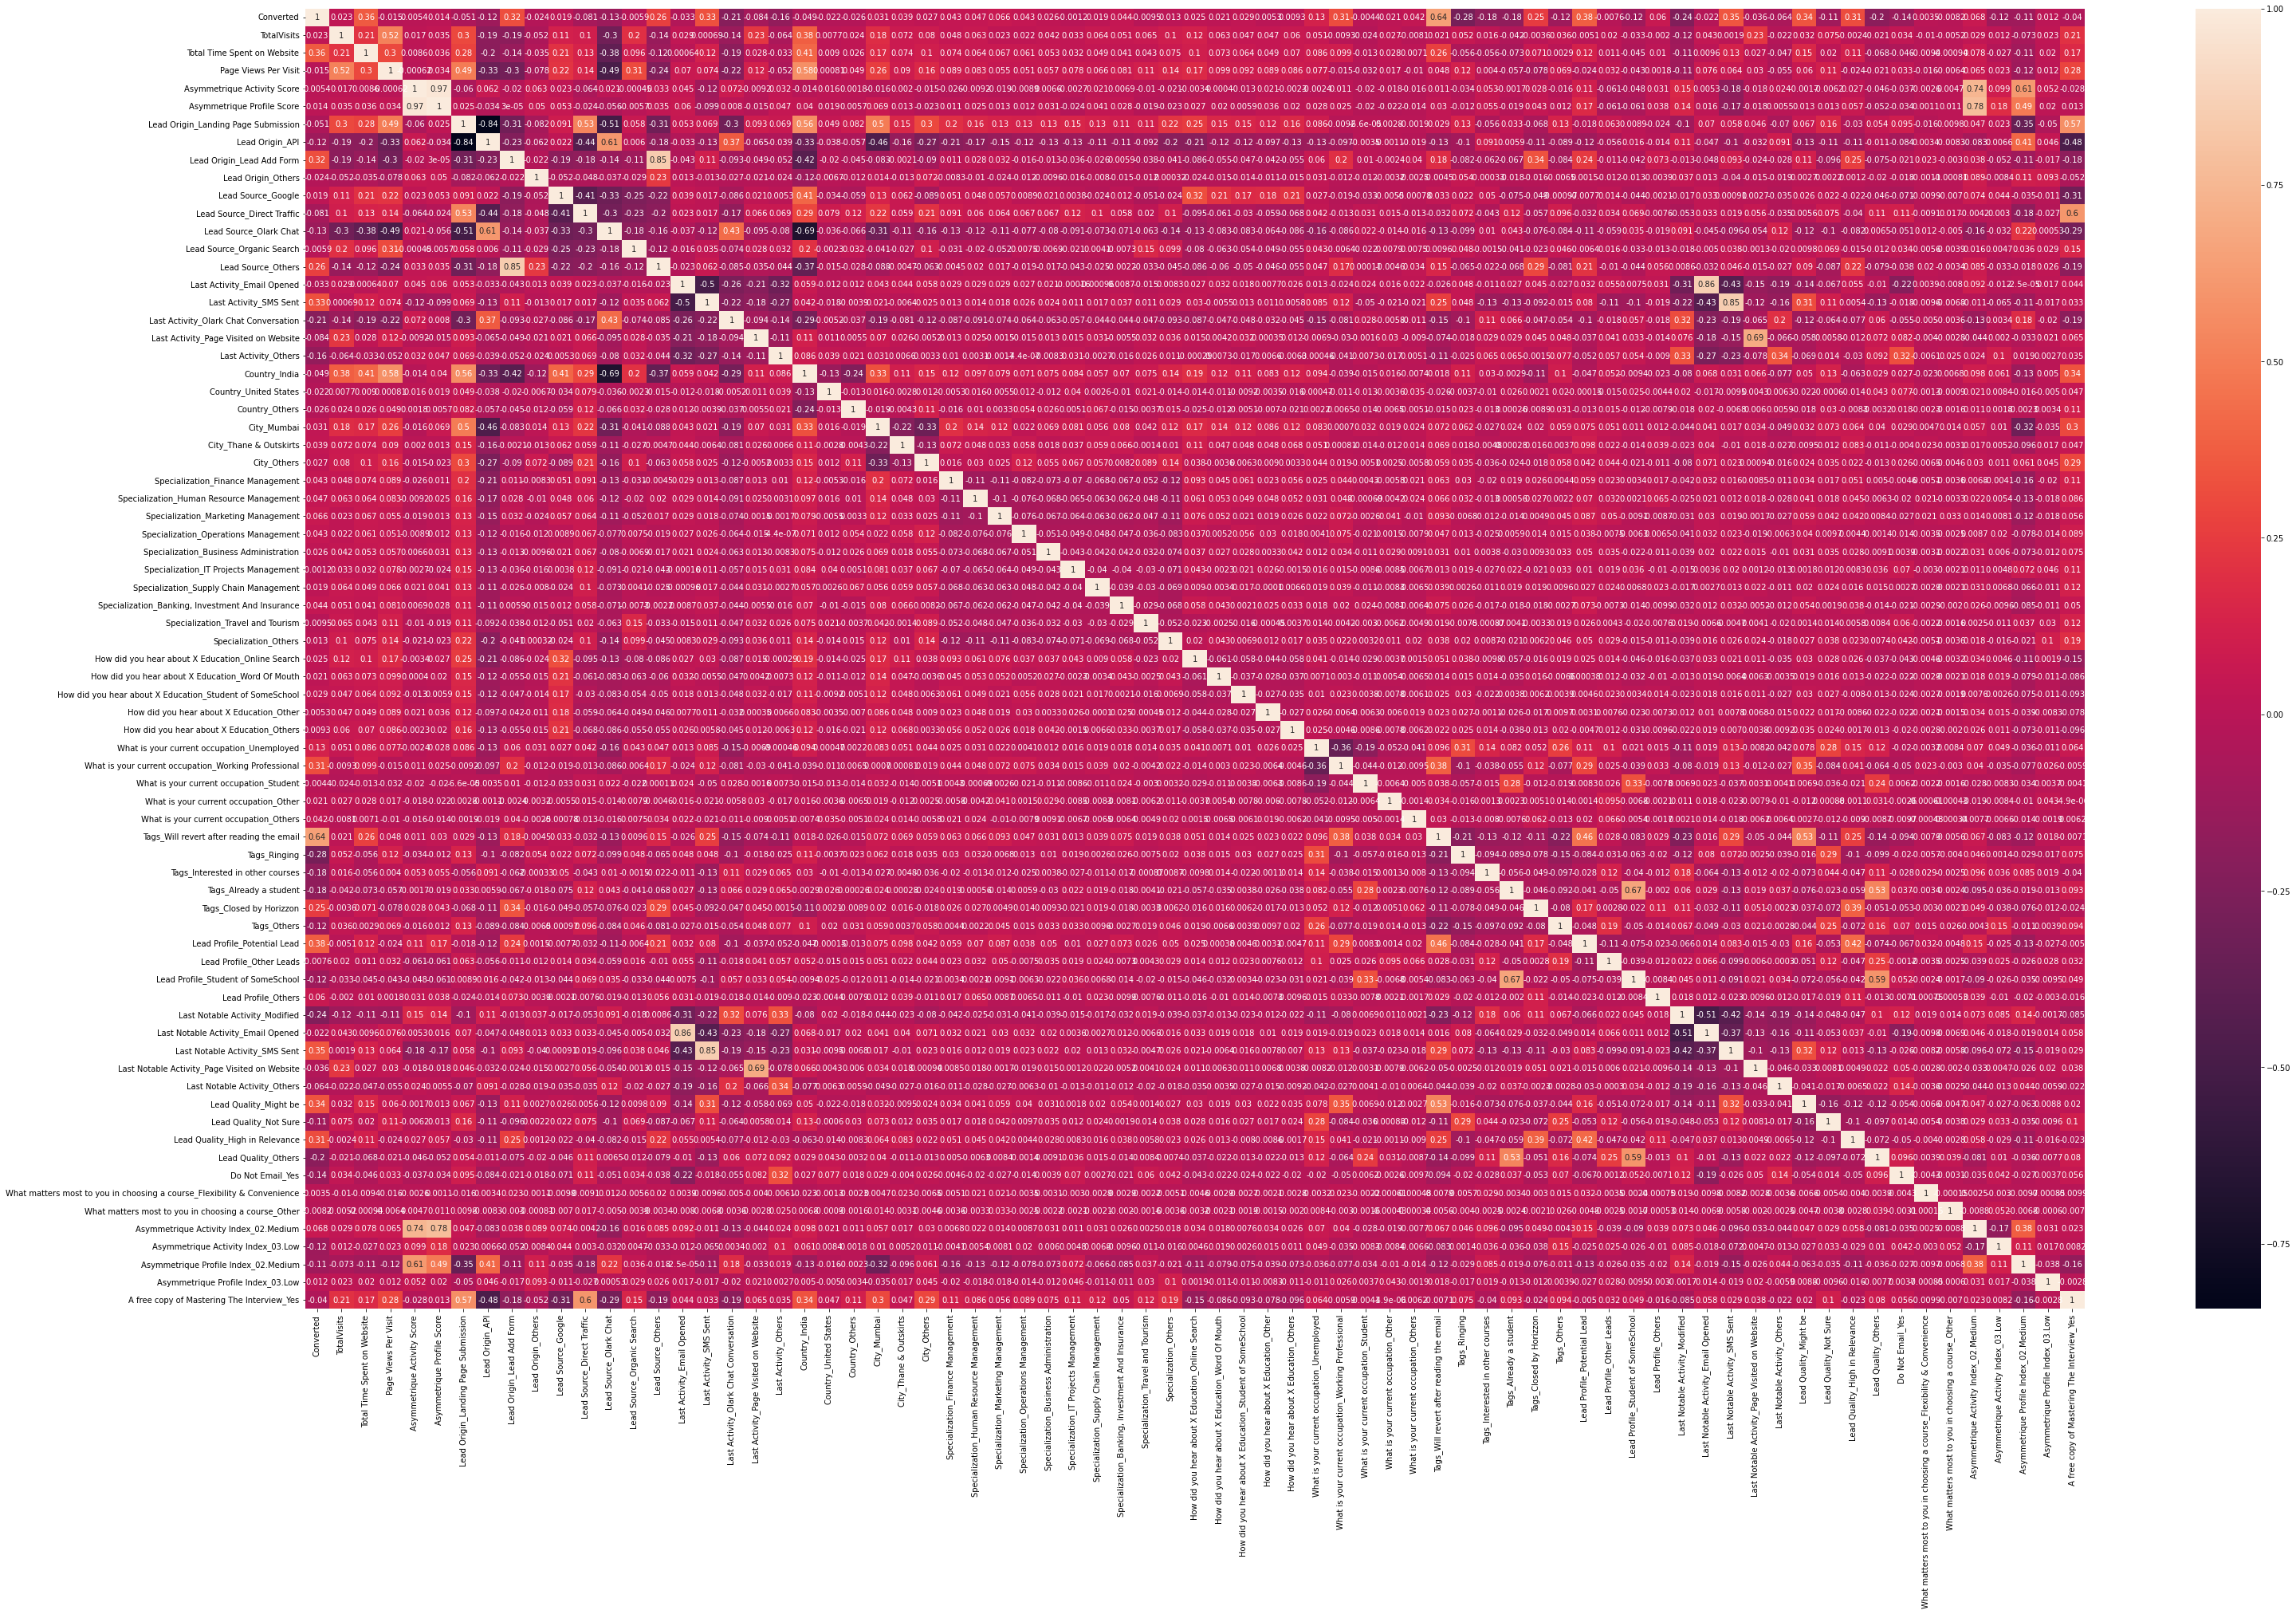

In [63]:
plt.figure(figsize = (50,30))
sns.heatmap(df.corr(),annot = True)
plt.show()

<b> Few Columns are highly correlated
* Asymmetrique Activity Score & Asymmetrique Profile Score 
* Lead Origin_Landing Page Submission & Lead Origin_API 
* Lead Origin_Lead Add Form & Lead Source_other
* Asymmetrique Profile Index_02.Medium & Asymmetrique Activity Score
* Asymmetrique Profile Index_02.Medium & Asymmetrique Profile Score
* etc... 

We will drop the columns as it will create multicollinearity 

In [64]:
df = df.drop(['Asymmetrique Profile Score', 'Lead Origin_API', 'Lead Profile_Others','Asymmetrique Profile Index_02.Medium'], axis=1)

# Train Test Split 

In [65]:
X = df.drop(['Converted'], axis=1)
y = df['Converted']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7392, 68), (1848, 68), (7392,), (1848,))

In [68]:
y_test.value_counts()

0    1107
1     741
Name: Converted, dtype: int64

# Feature Scaling

In [69]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Email Opened,Last Activity_SMS Sent,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Others,Country_India,Country_United States,Country_Others,City_Mumbai,City_Thane & Outskirts,City_Others,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Business Administration,Specialization_IT Projects Management,Specialization_Supply Chain Management,"Specialization_Banking, Investment And Insurance",Specialization_Travel and Tourism,Specialization_Others,How did you hear about X Education_Online Search,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Other,How did you hear about X Education_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_Student,What is your current occupation_Other,What is your current occupation_Others,Tags_Will revert after reading the email,Tags_Ringing,Tags_Interested in other courses,Tags_Already a student,Tags_Closed by Horizzon,Tags_Others,Lead Profile_Potential Lead,Lead Profile_Other Leads,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,Last Notable Activity_Page Visited on Website,Last Notable Activity_Others,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_High in Relevance,Lead Quality_Others,Do Not Email_Yes,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
600123,0.007968,0.105194,0.036364,0.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
614204,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
617857,0.011952,0.174296,0.054545,0.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
644758,0.015936,0.393486,0.072727,0.833333,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
607605,0.007968,0.062940,0.036364,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection Using RFE (Sorted the features Based on rank)

In [70]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=1)            
rfe = rfe.fit(X_train, y_train)

In [71]:
data = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
sorted(data, key=lambda x: x[2])

[('Tags_Closed by Horizzon', True, 1),
 ('Tags_Will revert after reading the email', False, 2),
 ('Total Time Spent on Website', False, 3),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Tags_Already a student', False, 5),
 ('Tags_Ringing', False, 6),
 ('Tags_Interested in other courses', False, 7),
 ('Last Notable Activity_SMS Sent', False, 8),
 ('Lead Quality_Others', False, 9),
 ('Asymmetrique Activity Index_03.Low', False, 10),
 ('Do Not Email_Yes', False, 11),
 ('What is your current occupation_Working Professional', False, 12),
 ('What is your current occupation_Unemployed', False, 13),
 ('What is your current occupation_Student', False, 14),
 ('Tags_Others', False, 15),
 ('Lead Quality_High in Relevance', False, 16),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Country_Others', False, 18),
 ('TotalVisits', False, 19),
 ('Country_United States', False, 20),
 ('Country_India', False, 21),
 ('What is your current occupation_Others', False, 22),
 ('Lead Origin_Others', Fa

# Function
## VIF Function

In [72]:
def vif(data):
    vif = pd.DataFrame()
    data_without_const = data.drop('const', 1)
    vif['Features'] = data_without_const.columns
    vif['VIF'] = [variance_inflation_factor(data_without_const.values, i) for i in range(data_without_const.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

## Predicted Dataset

In [73]:
def prediction(model, X_train, y_train, threshold=0.5):
    y_train_pred = model.predict(X_train)
    y_train_pred = y_train_pred.values.reshape(-1)
    
    #Creating a dataframe with the actual churn flag and the predicted probabilities
    y_train_pred_data = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_data['Lead Number'] = y_train.index
    #y_train_pred_data.head()
    
    # Creating new column 'predicted' with 1 if prob > 0.5 else 0
    #print("Threshold:", threshold)
    y_train_pred_data['predicted'] = y_train_pred_data.Converted_Prob.map(lambda x: 1 if x > threshold else 0)
    return y_train_pred_data

## Model Evaluation

In [74]:
def model_evaluation(actual, predicted):
    confusion = metrics.confusion_matrix(actual, predicted)
    print("Confusion Matrix:\n", confusion)
    
    # ROC- AUC score
    print("ROC-AUC score  test dataset:", metrics.roc_auc_score(actual,predicted))
    #Precision score
    print("precision score  test dataset:", metrics.precision_score(actual,predicted))
    #Recall Score
    print("Recall score  test dataset:", metrics.recall_score(actual,predicted))
    #f1 score
    print("f1 score  test dataset :", metrics.f1_score(actual,predicted))

## Plotting the ROC Curve

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Model Training
## Model1

In [76]:
rfe15 = RFE(logreg, n_features_to_select=15)            
rfe15 = rfe15.fit(X_train, y_train)
col15 = X_train.columns[rfe15.support_]
col15

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'Tags_Will revert after reading the email', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Others',
       'Last Notable Activity_SMS Sent', 'Lead Quality_Others',
       'Do Not Email_Yes', 'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [77]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col15])
logm15 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res15 = logm15.fit()
res15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1689.4
Date:                Sun, 15 Oct 2023   Deviance:                       3378.7
Time:                        14:39:19   Pearson chi2:                 9.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5821
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8350      0.091    -31.147      0.000      -3.013      -2.657
Total Time Spent on Website                              3.6941      0.188     19.679      0.000       3.326       4.062
Lead Origin_Lead Add Form                                2.1290      0.242      8.801      0.000       1.655       2.603
What is your current occupation_Unemployed               2.0491      0.126     16.274      0.000       1.802       2.296
What is your current occupation_Working Professional     2.6266      0.304      8.634      0.000       2.030       3.223
What is your current occupation_Student                  1.7152      0.461      3.725      0.000       0.813       2.618
Tags_Will revert after reading the email                 2.6224      0.183     14.326      0.000       2.264       2.981
Tags_Ringing                                            -4.7134      0.237    -19.858      0.000      -5.179      -4.248
Tags_Interested in other courses                        -3.6992      0.343    -10.773      0.000      -4.372      -3.026
Tags_Already a student                                  -4.1962      0.603     -6.959      0.000      -5.378      -3.014
Tags_Closed by Horizzon                                  4.2694      0.725      5.891      0.000       2.849       5.690
Tags_Others                                             -1.3794      0.137    -10.085      0.000      -1.648      -1.111
Last Notable Activity_SMS Sent                           1.8663      0.106     17.543      0.000       1.658       2.075
Lead Quality_Others                                     -1.6122      0.366     -4.405      0.000      -2.330      -0.895
Do Not Email_Yes                                        -1.5503      0.200     -7.760      0.000      -1.942      -1.159
Asymmetrique Activity Index_03.Low                      -1.6753      0.303     -5.531      0.000      -2.269      -1.082
========================================================================================================================
"""

In [78]:
vif(X_train_sm)

,Features,VIF
2,What is your current occupation_Unemployed,7.73
5,Tags_Will revert after reading the email,3.77
10,Tags_Others,2.51
6,Tags_Ringing,2.47
3,What is your current occupation_Working Profes...,2.27
8,Tags_Already a student,2.11
0,Total Time Spent on Website,1.86
12,Lead Quality_Others,1.66
7,Tags_Interested in other courses,1.63
9,Tags_Closed by Horizzon,1.59


Confusion Matrix:
 [[4367  205]
 [ 441 2379]]
ROC-AUC score  test dataset: 0.8993894380223748
precision score  test dataset: 0.9206656346749226
Recall score  test dataset: 0.8436170212765958
f1 score  test dataset : 0.880458919319023


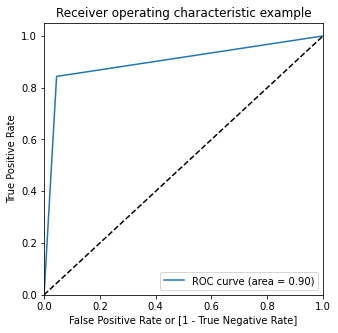

In [79]:
#Let's build prediction Data 
y_train_pred_data = prediction(res15, X_train_sm, y_train)
# Model Evaluation 
model_evaluation(y_train_pred_data.Converted, y_train_pred_data.predicted)
#Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data.predicted, drop_intermediate = False )
draw_roc(y_train_pred_data.Converted, y_train_pred_data.predicted)

In [80]:
# based on vif column droped 
X_train_sm = X_train_sm.drop(['What is your current occupation_Unemployed'], axis=1, errors="ignore")
logm15 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res15 = logm15.fit()
res15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1828.6
Date:                Sun, 15 Oct 2023   Deviance:                       3657.2
Time:                        14:39:19   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3067      0.075    -30.747      0.000      -2.454      -2.160
Total Time Spent on Website                              3.6330      0.178     20.417      0.000       3.284       3.982
Lead Origin_Lead Add Form                                2.9146      0.227     12.861      0.000       2.470       3.359
What is your current occupation_Working Professional     0.7588      0.287      2.641      0.008       0.196       1.322
What is your current occupation_Student                  0.1062      0.487      0.218      0.827      -0.849       1.061
Tags_Will revert after reading the email                 3.9835      0.164     24.259      0.000       3.662       4.305
Tags_Ringing                                            -3.4026      0.223    -15.236      0.000      -3.840      -2.965
Tags_Interested in other courses                        -2.2927      0.332     -6.896      0.000      -2.944      -1.641
Tags_Already a student                                  -2.7174      0.598     -4.547      0.000      -3.889      -1.546
Tags_Closed by Horizzon                                  5.5162      0.719      7.668      0.000       4.106       6.926
Tags_Others                                             -0.0418      0.107     -0.389      0.697      -0.252       0.169
Last Notable Activity_SMS Sent                           2.0476      0.102     20.042      0.000       1.847       2.248
Lead Quality_Others                                     -1.4950      0.367     -4.071      0.000      -2.215      -0.775
Do Not Email_Yes                                        -1.4081      0.192     -7.340      0.000      -1.784      -1.032
Asymmetrique Activity Index_03.Low                      -1.5524      0.306     -5.071      0.000      -2.152      -0.952
========================================================================================================================
"""

In [81]:
# based on P Value column droped 
X_train_sm = X_train_sm.drop(['What is your current occupation_Student', 'Tags_Others'], axis=1, errors="ignore")
logm15 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res15 = logm15.fit()
res15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1828.7
Date:                Sun, 15 Oct 2023   Deviance:                       3657.4
Time:                        14:39:19   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3148      0.072    -32.206      0.000      -2.456      -2.174
Total Time Spent on Website                              3.6281      0.177     20.468      0.000       3.281       3.976
Lead Origin_Lead Add Form                                2.9152      0.227     12.870      0.000       2.471       3.359
What is your current occupation_Working Professional     0.7467      0.286      2.614      0.009       0.187       1.307
Tags_Will revert after reading the email                 3.9984      0.161     24.875      0.000       3.683       4.313
Tags_Ringing                                            -3.3898      0.221    -15.359      0.000      -3.822      -2.957
Tags_Interested in other courses                        -2.2784      0.331     -6.891      0.000      -2.926      -1.630
Tags_Already a student                                  -2.6929      0.595     -4.529      0.000      -3.858      -1.528
Tags_Closed by Horizzon                                  5.5272      0.719      7.689      0.000       4.118       6.936
Last Notable Activity_SMS Sent                           2.0437      0.102     20.097      0.000       1.844       2.243
Lead Quality_Others                                     -1.5188      0.361     -4.208      0.000      -2.226      -0.811
Do Not Email_Yes                                        -1.4091      0.192     -7.350      0.000      -1.785      -1.033
Asymmetrique Activity Index_03.Low                      -1.5612      0.305     -5.121      0.000      -2.159      -0.964
========================================================================================================================
"""

In [82]:
vif(X_train_sm)

,Features,VIF
3,Tags_Will revert after reading the email,1.91
0,Total Time Spent on Website,1.66
9,Lead Quality_Others,1.52
6,Tags_Already a student,1.45
8,Last Notable Activity_SMS Sent,1.44
1,Lead Origin_Lead Add Form,1.35
2,What is your current occupation_Working Profes...,1.32
7,Tags_Closed by Horizzon,1.29
4,Tags_Ringing,1.12
5,Tags_Interested in other courses,1.07


Confusion Matrix:
 [[4336  236]
 [ 526 2294]]
ROC-AUC score  test dataset: 0.8809283148117123
precision score  test dataset: 0.9067193675889328
Recall score  test dataset: 0.8134751773049645
f1 score  test dataset : 0.857570093457944


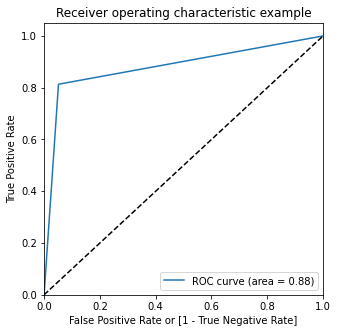

In [83]:
#Let's build prediction Data 
y_train_pred_data = prediction(res15, X_train_sm, y_train)
# Model Evaluation 
model_evaluation(y_train_pred_data.Converted, y_train_pred_data.predicted)
#Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data.predicted, drop_intermediate = False )
draw_roc(y_train_pred_data.Converted, y_train_pred_data.predicted)

## Model 2

In [84]:
rfe20 = RFE(logreg, n_features_to_select=20)            
rfe20 = rfe20.fit(X_train, y_train)
col20 = X_train.columns[rfe20.support_]
col20

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Country_United States', 'Country_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'Tags_Will revert after reading the email', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Others',
       'Last Notable Activity_SMS Sent', 'Lead Quality_High in Relevance',
       'Lead Quality_Others', 'Do Not Email_Yes',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [85]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col20])
logm20 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res20 = logm20.fit()
res20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1667.4
Date:                Sun, 15 Oct 2023   Deviance:                       3334.7
Time:                        14:39:26   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5846
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7163      0.098    -27.746      0.000      -2.908      -2.524
TotalVisits                                              2.5309      1.958      1.293      0.196      -1.306       6.368
Total Time Spent on Website                              3.5885      0.191     18.796      0.000       3.214       3.963
Lead Origin_Lead Add Form                                1.9864      0.244      8.154      0.000       1.509       2.464
Last Activity_Olark Chat Conversation                   -0.9489      0.195     -4.867      0.000      -1.331      -0.567
Country_United States                                   -0.5851      0.574     -1.019      0.308      -1.710       0.540
Country_Others                                          -0.5308      0.303     -1.750      0.080      -1.125       0.064
What is your current occupation_Unemployed               2.0559      0.127     16.180      0.000       1.807       2.305
What is your current occupation_Working Professional     2.7074      0.302      8.965      0.000       2.115       3.299
What is your current occupation_Student                  1.7108      0.458      3.734      0.000       0.813       2.609
Tags_Will revert after reading the email                 2.4219      0.187     12.944      0.000       2.055       2.789
Tags_Ringing                                            -4.7737      0.237    -20.105      0.000      -5.239      -4.308
Tags_Interested in other courses                        -3.7620      0.347    -10.850      0.000      -4.442      -3.082
Tags_Already a student                                  -4.2844      0.604     -7.090      0.000      -5.469      -3.100
Tags_Closed by Horizzon                                  3.8289      0.738      5.185      0.000       2.381       5.276
Tags_Others                                             -1.4583      0.139    -10.526      0.000      -1.730      -1.187
Last Notable Activity_SMS Sent                           1.7928      0.108     16.635      0.000       1.582       2.004
Lead Quality_High in Relevance                           1.1532      0.356      3.243      0.001       0.456       1.850
Lead Quality_Others                                     -1.5939      0.366     -4.357      0.000      -2.311      -0.877
Do Not Email_Yes                                        -1.5866      0.199     -7.963      0.000      -1.977      -1.196
Asymmetrique Activity Index_03.Low                      -1.7280      0.303     -5.696      0.000      -2.323      -1.133
========================================================================================================================
"""

In [86]:
X_train_sm = X_train_sm.drop(['TotalVisits','Country_United States','Country_Others'], axis=1, errors="ignore")
logm20 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res20 = logm20.fit()
res20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1670.1
Date:                Sun, 15 Oct 2023   Deviance:                       3340.1
Time:                        14:39:26   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5843
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6960      0.095    -28.519      0.000      -2.881      -2.511
Total Time Spent on Website                              3.6034      0.189     19.039      0.000       3.232       3.974
Lead Origin_Lead Add Form                                1.9688      0.242      8.130      0.000       1.494       2.443
Last Activity_Olark Chat Conversation                   -0.9483      0.194     -4.889      0.000      -1.328      -0.568
What is your current occupation_Unemployed               2.0569      0.127     16.224      0.000       1.808       2.305
What is your current occupation_Working Professional     2.6850      0.301      8.929      0.000       2.096       3.274
What is your current occupation_Student                  1.7059      0.456      3.743      0.000       0.813       2.599
Tags_Will revert after reading the email                 2.4233      0.187     12.973      0.000       2.057       2.789
Tags_Ringing                                            -4.7630      0.237    -20.079      0.000      -5.228      -4.298
Tags_Interested in other courses                        -3.7410      0.346    -10.819      0.000      -4.419      -3.063
Tags_Already a student                                  -4.2895      0.604     -7.099      0.000      -5.474      -3.105
Tags_Closed by Horizzon                                  3.8112      0.735      5.186      0.000       2.371       5.252
Tags_Others                                             -1.4649      0.138    -10.607      0.000      -1.736      -1.194
Last Notable Activity_SMS Sent                           1.7796      0.107     16.565      0.000       1.569       1.990
Lead Quality_High in Relevance                           1.1632      0.356      3.266      0.001       0.465       1.861
Lead Quality_Others                                     -1.5857      0.365     -4.342      0.000      -2.301      -0.870
Do Not Email_Yes                                        -1.5846      0.199     -7.982      0.000      -1.974      -1.196
Asymmetrique Activity Index_03.Low                      -1.7167      0.303     -5.668      0.000      -2.310      -1.123
========================================================================================================================
"""

In [87]:
vif(X_train_sm)

,Features,VIF
3,What is your current occupation_Unemployed,7.78
6,Tags_Will revert after reading the email,3.99
11,Tags_Others,2.51
7,Tags_Ringing,2.47
4,What is your current occupation_Working Profes...,2.31
9,Tags_Already a student,2.11
0,Total Time Spent on Website,1.86
10,Tags_Closed by Horizzon,1.84
14,Lead Quality_Others,1.66
8,Tags_Interested in other courses,1.65


Confusion Matrix:
 [[4368  204]
 [ 442 2378]]
ROC-AUC score  test dataset: 0.8993214943876696
precision score  test dataset: 0.9209914794732765
Recall score  test dataset: 0.8432624113475178
f1 score  test dataset : 0.880414661236579


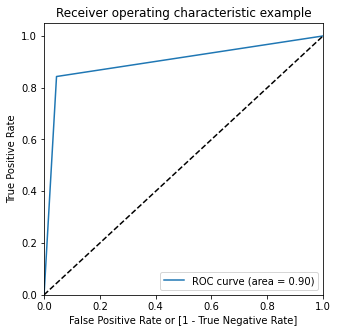

In [88]:
#Let's build prediction Data 
y_train_pred_data = prediction(res20, X_train_sm, y_train)
# Model Evaluation 
model_evaluation(y_train_pred_data.Converted, y_train_pred_data.predicted)
#Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data.predicted, drop_intermediate = False )
draw_roc(y_train_pred_data.Converted, y_train_pred_data.predicted)

## Model 3

In [89]:
rfe25 = RFE(logreg, n_features_to_select=25)            
rfe25 = rfe25.fit(X_train, y_train)
col25 = X_train.columns[rfe25.support_]
col25

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Others',
       'Last Activity_Olark Chat Conversation', 'Country_India',
       'Country_United States', 'Country_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'What is your current occupation_Others',
       'Tags_Will revert after reading the email', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Others',
       'Last Notable Activity_SMS Sent', 'Lead Quality_High in Relevance',
       'Lead Quality_Others', 'Do Not Email_Yes',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [90]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col25])
logm25 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res25 = logm25.fit()
res25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7366
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1619.2
Date:                Sun, 15 Oct 2023   Deviance:                       3238.5
Time:                        14:39:32   Pearson chi2:                 1.06e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5899
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0051      0.119    -16.875      0.000      -2.238      -1.772
TotalVisits                                              7.1819      2.184      3.288      0.001       2.901      11.463
Total Time Spent on Website                              4.4823      0.222     20.162      0.000       4.047       4.918
Page Views Per Visit                                    -3.0401      1.598     -1.903      0.057      -6.172       0.092
Lead Origin_Lead Add Form                                1.2118      0.256      4.735      0.000       0.710       1.713
Lead Origin_Others                                      -1.2908      0.651     -1.983      0.047      -2.567      -0.015
Last Activity_Olark Chat Conversation                   -1.3070      0.194     -6.730      0.000      -1.688      -0.926
Country_India                                           -1.1188      0.156     -7.178      0.000      -1.424      -0.813
Country_United States                                   -1.6113      0.611     -2.636      0.008      -2.809      -0.413
Country_Others                                          -1.5136      0.341     -4.433      0.000      -2.183      -0.844
Specialization_Travel and Tourism                       -0.7880      0.349     -2.261      0.024      -1.471      -0.105
What is your current occupation_Unemployed               1.9805      0.129     15.319      0.000       1.727       2.234
What is your current occupation_Working Professional     2.6290      0.307      8.564      0.000       2.027       3.231
What is your current occupation_Student                  1.6390      0.455      3.598      0.000       0.746       2.532
What is your current occupation_Others                  21.1796   1.41e+04      0.002      0.999   -2.76e+04    2.76e+04
Tags_Will revert after reading the email                 2.6192      0.194     13.517      0.000       2.239       2.999
Tags_Ringing                                            -4.6380      0.241    -19.218      0.000      -5.111      -4.165
Tags_Interested in other courses                        -3.7208      0.363    -10.254      0.000      -4.432      -3.010
Tags_Already a student                                  -4.2292      0.611     -6.927      0.000      -5.426      -3.033
Tags_Closed by Horizzon                                  3.8740      0.741      5.230      0.000       2.422       5.326
Tags_Others                                             -1.2372      0.142     -8.690      0.000      -1.516      -0.958
Last Notable Activity_SMS Sent                           1.8208      0.110     16.569      0.000       1.605       2.036
Lead Quality_High in Relevance                           1

In [91]:
X_train_sm = X_train_sm.drop(['What is your current occupation_Others','Page Views Per Visit'], 1)
X_train_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Others',
       'Last Activity_Olark Chat Conversation', 'Country_India',
       'Country_United States', 'Country_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'Tags_Will revert after reading the email', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Others',
       'Last Notable Activity_SMS Sent', 'Lead Quality_High in Relevance',
       'Lead Quality_Others', 'Do Not Email_Yes',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [92]:
# Logistic regression model
logm25 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res25 = logm25.fit()
res25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7368
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1623.4
Date:                Sun, 15 Oct 2023   Deviance:                       3246.8
Time:                        14:39:33   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5895
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0061      0.118    -16.930      0.000      -2.238      -1.774
TotalVisits                                              5.9197      1.695      3.493      0.000       2.598       9.241
Total Time Spent on Website                              4.4596      0.221     20.154      0.000       4.026       4.893
Lead Origin_Lead Add Form                                1.2540      0.255      4.926      0.000       0.755       1.753
Lead Origin_Others                                      -1.2749      0.651     -1.958      0.050      -2.551       0.001
Last Activity_Olark Chat Conversation                   -1.3033      0.195     -6.699      0.000      -1.685      -0.922
Country_India                                           -1.2445      0.140     -8.881      0.000      -1.519      -0.970
Country_United States                                   -1.6725      0.599     -2.791      0.005      -2.847      -0.498
Country_Others                                          -1.6597      0.334     -4.975      0.000      -2.314      -1.006
Specialization_Travel and Tourism                       -0.8703      0.350     -2.489      0.013      -1.556      -0.185
What is your current occupation_Unemployed               1.9627      0.128     15.351      0.000       1.712       2.213
What is your current occupation_Working Professional     2.5881      0.307      8.417      0.000       1.985       3.191
What is your current occupation_Student                  1.6042      0.460      3.491      0.000       0.703       2.505
Tags_Will revert after reading the email                 2.6540      0.192     13.824      0.000       2.278       3.030
Tags_Ringing                                            -4.6420      0.241    -19.282      0.000      -5.114      -4.170
Tags_Interested in other courses                        -3.6917      0.359    -10.280      0.000      -4.395      -2.988
Tags_Already a student                                  -4.1959      0.611     -6.869      0.000      -5.393      -2.999
Tags_Closed by Horizzon                                  4.0878      0.742      5.512      0.000       2.634       5.542
Tags_Others                                             -1.2307      0.142     -8.692      0.000      -1.508      -0.953
Last Notable Activity_SMS Sent                           1.8091      0.110     16.506      0.000       1.594       2.024
Lead Quality_High in Relevance                           1.1399      0.360      3.167      0.002       0.434       1.845
Lead Quality_Others                                     -1.6149      0.378     -4.276      0.000      -2.355      -0.875
Do Not Email_Yes                                        -1

In [93]:
X_train_sm = X_train_sm.drop(['Lead Origin_Others'], 1)
X_train_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Country_India', 'Country_United States', 'Country_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'Tags_Will revert after reading the email', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Others',
       'Last Notable Activity_SMS Sent', 'Lead Quality_High in Relevance',
       'Lead Quality_Others', 'Do Not Email_Yes',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [94]:
logm25 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res25 = logm25.fit()
res25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7369
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1625.5
Date:                Sun, 15 Oct 2023   Deviance:                       3251.1
Time:                        14:39:33   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5893
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0407      0.118    -17.335      0.000      -2.271      -1.810
TotalVisits                                              5.9293      1.696      3.495      0.000       2.604       9.254
Total Time Spent on Website                              4.4475      0.221     20.123      0.000       4.014       4.881
Lead Origin_Lead Add Form                                1.2964      0.254      5.109      0.000       0.799       1.794
Last Activity_Olark Chat Conversation                   -1.2772      0.194     -6.576      0.000      -1.658      -0.897
Country_India                                           -1.2041      0.139     -8.673      0.000      -1.476      -0.932
Country_United States                                   -1.6345      0.599     -2.729      0.006      -2.808      -0.461
Country_Others                                          -1.6189      0.333     -4.865      0.000      -2.271      -0.967
Specialization_Travel and Tourism                       -0.8653      0.349     -2.479      0.013      -1.550      -0.181
What is your current occupation_Unemployed               1.9532      0.128     15.305      0.000       1.703       2.203
What is your current occupation_Working Professional     2.5810      0.308      8.390      0.000       1.978       3.184
What is your current occupation_Student                  1.6053      0.459      3.494      0.000       0.705       2.506
Tags_Will revert after reading the email                 2.6527      0.192     13.826      0.000       2.277       3.029
Tags_Ringing                                            -4.6393      0.240    -19.291      0.000      -5.111      -4.168
Tags_Interested in other courses                        -3.6873      0.359    -10.280      0.000      -4.390      -2.984
Tags_Already a student                                  -4.1799      0.610     -6.847      0.000      -5.376      -2.983
Tags_Closed by Horizzon                                  4.0988      0.741      5.530      0.000       2.646       5.551
Tags_Others                                             -1.2300      0.141     -8.704      0.000      -1.507      -0.953
Last Notable Activity_SMS Sent                           1.8163      0.110     16.587      0.000       1.602       2.031
Lead Quality_High in Relevance                           1.0947      0.357      3.068      0.002       0.395       1.794
Lead Quality_Others                                     -1.6077      0.377     -4.260      0.000      -2.347      -0.868
Do Not Email_Yes                                        -1.5919      0.204     -7.801      0.000      -1.992      -1.192
Asymmetrique Activity Index_03.Low                      -1

In [95]:
X_train_sm.drop('const', 1).columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Country_India', 'Country_United States', 'Country_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'Tags_Will revert after reading the email', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Others',
       'Last Notable Activity_SMS Sent', 'Lead Quality_High in Relevance',
       'Lead Quality_Others', 'Do Not Email_Yes',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

In [96]:
#Let's check the VIFs 
vif(X_train_sm)

,Features,VIF
8,What is your current occupation_Unemployed,8.04
4,Country_India,4.30
11,Tags_Will revert after reading the email,4.01
16,Tags_Others,2.57
1,Total Time Spent on Website,2.56
12,Tags_Ringing,2.55
9,What is your current occupation_Working Profes...,2.34
14,Tags_Already a student,2.13
15,Tags_Closed by Horizzon,1.85
0,TotalVisits,1.76


In [97]:
#Let's build prediction Data 
y_train_pred_data = prediction(res25, X_train_sm, y_train)

In [98]:
# Model Evaluation 
model_evaluation(y_train_pred_data.Converted, y_train_pred_data.predicted)

Confusion Matrix:
 [[4379  193]
 [ 444 2376]]
ROC-AUC score  test dataset: 0.9001698590867632
precision score  test dataset: 0.9248734916309849
Recall score  test dataset: 0.8425531914893617
f1 score  test dataset : 0.881796251623678


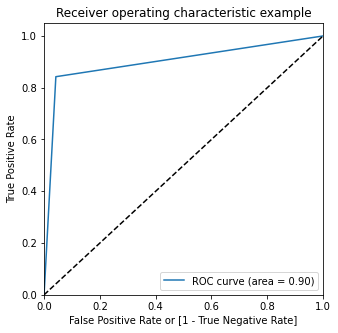

In [99]:
#Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data.predicted, drop_intermediate = False )
draw_roc(y_train_pred_data.Converted, y_train_pred_data.predicted)

## Model 4

In [100]:
rfe30 = RFE(logreg, n_features_to_select=30)            
rfe30 = rfe30.fit(X_train, y_train)
col30 = X_train.columns[rfe30.support_]
col30

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Others',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Last Activity_Olark Chat Conversation', 'Country_India',
       'Country_United States', 'Country_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'What is your current occupation_Others',
       'Tags_Will revert after reading the email', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Others',
       'Last Notable Activity_Modified', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_SMS Sent', 'Lead Quality_High in Relevance',
       'Lead Quality_Others', 'Do Not Email_Yes',
       'What matters most to you in cho

In [101]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col30])
logm30 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res30 = logm30.fit()
res30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7361
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1597.6
Date:                Sun, 15 Oct 2023   Deviance:                       3195.2
Time:                        14:39:39   Pearson chi2:                 1.00e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5923
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -2.1509      0.196    -10.997      0.000      -2.534      -1.768
TotalVisits                                                                 6.8964      2.123      3.249      0.001       2.736      11.057
Total Time Spent on Website                                                 4.4955      0.224     20.048      0.000       4.056       4.935
Page Views Per Visit                                                       -3.9160      1.669     -2.346      0.019      -7.187      -0.645
Lead Origin_Lead Add Form                                                   1.1985      0.258      4.652      0.000       0.694       1.703
Lead Origin_Others                                                         -1.4085      0.642     -2.194      0.028      -2.667      -0.150
Last Activity_Email Opened                                                  0.7629      0.226      3.374      0.001       0.320       1.206
Last Activity_SMS Sent                                                      1.2757      0.213      5.992      0.000       0.858       1.693
Last Activity_Olark Chat Conversation                                      -0.7404      0.225     -3.292      0.001      -1.181      -0.300
Country_India                                                              -1.0320      0.159     -6.475      0.000      -1.344      -0.720
Country_United States                                                      -1.5248      0.612     -2.492      0.013      -2.724      -0.326
Country_Others                                                             -1.4147      0.342     -4.135      0.000      -2.085      -0.744
Specialization_Travel and Tourism                                          -0.7377      0.351     -2.101      0.036      -1.426      -0.050
What is your current occupation_Unemployed                                  1.9892      0.132     15.051      0.000       1.730       2.248
What is your current occupation_Working Professional                        2.5913      0.310      8.362      0.000       1.984       3.199
What is your current occupation_Student                                     1.8382      0.471      3.901      0.000       0.915       2.762
What is your current occupation_Others                                     21.2107   1.41e+04      0.001      0.999   -2.77e+04    2.77e+04
Tags_Will revert after reading the email                                    2.6934      0.197     13.671      0.000       2.307       3.080
Tags_Ringing                                                               -4.6206      0.242    -19.127      0.000      -5.094      -4.147
Tag

In [102]:
X_train_sm = X_train_sm.drop(['What is your current occupation_Others','What matters most to you in choosing a course_Flexibility & Convenience'], axis=1, errors='ignore')
logm30 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res30 = logm30.fit()
res30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7363
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.3
Date:                Sun, 15 Oct 2023   Deviance:                       3202.5
Time:                        14:39:39   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5919
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1366      0.195    -10.955      0.000      -2.519      -1.754
TotalVisits                                              6.8700      2.115      3.249      0.001       2.725      11.015
Total Time Spent on Website                              4.4893      0.224     20.049      0.000       4.050       4.928
Page Views Per Visit                                    -3.9898      1.670     -2.389      0.017      -7.263      -0.716
Lead Origin_Lead Add Form                                1.2202      0.256      4.767      0.000       0.718       1.722
Lead Origin_Others                                      -1.4133      0.644     -2.196      0.028      -2.675      -0.152
Last Activity_Email Opened                               0.7827      0.225      3.478      0.001       0.342       1.224
Last Activity_SMS Sent                                   1.2698      0.213      5.965      0.000       0.853       1.687
Last Activity_Olark Chat Conversation                   -0.7465      0.225     -3.319      0.001      -1.187      -0.306
Country_India                                           -1.0336      0.159     -6.497      0.000      -1.345      -0.722
Country_United States                                   -1.4926      0.602     -2.478      0.013      -2.673      -0.312
Country_Others                                          -1.4220      0.342     -4.157      0.000      -2.092      -0.752
Specialization_Travel and Tourism                       -0.7460      0.352     -2.119      0.034      -1.436      -0.056
What is your current occupation_Unemployed               1.9610      0.131     15.010      0.000       1.705       2.217
What is your current occupation_Working Professional     2.5383      0.309      8.203      0.000       1.932       3.145
What is your current occupation_Student                  1.7989      0.473      3.803      0.000       0.872       2.726
Tags_Will revert after reading the email                 2.7522      0.196     14.064      0.000       2.369       3.136
Tags_Ringing                                            -4.5975      0.241    -19.078      0.000      -5.070      -4.125
Tags_Interested in other courses                        -3.5999      0.365     -9.853      0.000      -4.316      -2.884
Tags_Already a student                                  -4.2227      0.613     -6.892      0.000      -5.424      -3.022
Tags_Closed by Horizzon                                  4.1212      0.741      5.559      0.000       2.668       5.574
Tags_Others                                             -1.1822      0.145     -8.162      0.000      -1.466      -0.898
Last Notable Activity_Modified                          -0

In [103]:
#Let's check the VIFs 
vif(X_train_sm)

,Features,VIF
22,Last Notable Activity_Email Opened,9.35
12,What is your current occupation_Unemployed,8.57
5,Last Activity_Email Opened,8.34
23,Last Notable Activity_SMS Sent,7.56
8,Country_India,7.51
6,Last Activity_SMS Sent,6.70
2,Page Views Per Visit,4.03
15,Tags_Will revert after reading the email,4.02
21,Last Notable Activity_Modified,3.91
20,Tags_Others,2.60


Confusion Matrix:
 [[4363  209]
 [ 387 2433]]
ROC-AUC score  test dataset: 0.908526460788146
precision score  test dataset: 0.920893262679788
Recall score  test dataset: 0.8627659574468085
f1 score  test dataset : 0.8908824606371293


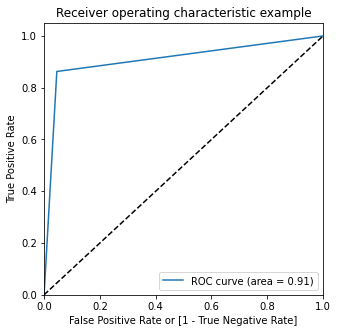

In [104]:
#Let's build prediction Data 
y_train_pred_data = prediction(res30, X_train_sm, y_train)
# Model Evaluation 
model_evaluation(y_train_pred_data.Converted, y_train_pred_data.predicted)
#Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data.predicted, drop_intermediate = False )
draw_roc(y_train_pred_data.Converted, y_train_pred_data.predicted)

<b> As we can Country coefficient is negative and during feature eng. we saw customer filled wrong information so we drop the feature.


In [105]:
X_train_sm = X_train_sm.drop(['Country_United States','Country_Others','Country_India','Lead Origin_Others'
                             ,'Specialization_Travel and Tourism'], axis=1, errors='ignore')

In [106]:
logm30 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res30 = logm30.fit()
res30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7368
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1627.1
Date:                Sun, 15 Oct 2023   Deviance:                       3254.2
Time:                        14:39:40   Pearson chi2:                 9.91e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5891
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5445      0.189    -13.479      0.000      -2.914      -2.174
TotalVisits                                              5.8023      1.930      3.006      0.003       2.020       9.585
Total Time Spent on Website                              3.9497      0.203     19.464      0.000       3.552       4.347
Page Views Per Visit                                    -9.2967      1.520     -6.117      0.000     -12.276      -6.318
Lead Origin_Lead Add Form                                1.6968      0.247      6.864      0.000       1.212       2.181
Last Activity_Email Opened                               0.9224      0.221      4.170      0.000       0.489       1.356
Last Activity_SMS Sent                                   1.3166      0.209      6.313      0.000       0.908       1.725
Last Activity_Olark Chat Conversation                   -0.4639      0.222     -2.087      0.037      -0.900      -0.028
What is your current occupation_Unemployed               1.9932      0.130     15.373      0.000       1.739       2.247
What is your current occupation_Working Professional     2.5897      0.303      8.545      0.000       1.996       3.184
What is your current occupation_Student                  1.8720      0.470      3.985      0.000       0.951       2.793
Tags_Will revert after reading the email                 2.6313      0.193     13.656      0.000       2.254       3.009
Tags_Ringing                                            -4.6417      0.239    -19.441      0.000      -5.110      -4.174
Tags_Interested in other courses                        -3.6501      0.361    -10.122      0.000      -4.357      -2.943
Tags_Already a student                                  -4.2956      0.608     -7.068      0.000      -5.487      -3.105
Tags_Closed by Horizzon                                  3.9093      0.736      5.315      0.000       2.468       5.351
Tags_Others                                             -1.3138      0.142     -9.230      0.000      -1.593      -1.035
Last Notable Activity_Modified                          -0.7496      0.199     -3.773      0.000      -1.139      -0.360
Last Notable Activity_Email Opened                      -0.7470      0.273     -2.740      0.006      -1.281      -0.213
Last Notable Activity_SMS Sent                           0.5539      0.266      2.083      0.037       0.033       1.075
Lead Quality_High in Relevance                           1.0561      0.359      2.939      0.003       0.352       1.760
Lead Quality_Others                                     -1.4868      0.369     -4.033      0.000      -2.209      -0.764
Do Not Email_Yes                                        -1

In [107]:
#Let's check the VIFs 
vif(X_train_sm)

,Features,VIF
17,Last Notable Activity_Email Opened,8.79
7,What is your current occupation_Unemployed,8.54
4,Last Activity_Email Opened,8.32
18,Last Notable Activity_SMS Sent,7.33
5,Last Activity_SMS Sent,6.70
10,Tags_Will revert after reading the email,4.01
16,Last Notable Activity_Modified,3.33
2,Page Views Per Visit,3.32
15,Tags_Others,2.57
11,Tags_Ringing,2.53


In [108]:
X_train_sm = X_train_sm.drop(['Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent'], axis=1, errors='ignore')
logm30 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res30 = logm30.fit()
res30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7370
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1639.8
Date:                Sun, 15 Oct 2023   Deviance:                       3279.5
Time:                        14:39:40   Pearson chi2:                 9.85e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5647      0.164    -15.627      0.000      -2.886      -2.243
TotalVisits                                              5.5689      1.876      2.969      0.003       1.893       9.245
Total Time Spent on Website                              3.9528      0.203     19.518      0.000       3.556       4.350
Page Views Per Visit                                    -9.4298      1.502     -6.279      0.000     -12.373      -6.487
Lead Origin_Lead Add Form                                1.6564      0.247      6.696      0.000       1.172       2.141
Last Activity_Email Opened                               0.3076      0.146      2.106      0.035       0.021       0.594
Last Activity_SMS Sent                                   1.7240      0.143     12.083      0.000       1.444       2.004
Last Activity_Olark Chat Conversation                   -0.4576      0.222     -2.064      0.039      -0.892      -0.023
What is your current occupation_Unemployed               1.9975      0.128     15.547      0.000       1.746       2.249
What is your current occupation_Working Professional     2.5943      0.305      8.499      0.000       1.996       3.193
What is your current occupation_Student                  1.8416      0.469      3.923      0.000       0.922       2.762
Tags_Will revert after reading the email                 2.6459      0.192     13.747      0.000       2.269       3.023
Tags_Ringing                                            -4.5591      0.236    -19.340      0.000      -5.021      -4.097
Tags_Interested in other courses                        -3.5674      0.359     -9.934      0.000      -4.271      -2.864
Tags_Already a student                                  -4.3408      0.608     -7.137      0.000      -5.533      -3.149
Tags_Closed by Horizzon                                  4.1220      0.736      5.602      0.000       2.680       5.564
Tags_Others                                             -1.2641      0.141     -8.972      0.000      -1.540      -0.988
Last Notable Activity_Modified                          -0.7409      0.110     -6.709      0.000      -0.957      -0.524
Lead Quality_High in Relevance                           1.0688      0.362      2.955      0.003       0.360       1.778
Lead Quality_Others                                     -1.5287      0.370     -4.135      0.000      -2.253      -0.804
Do Not Email_Yes                                        -1.3782      0.210     -6.571      0.000      -1.789      -0.967
Asymmetrique Activity Index_03.Low                      -1.7120      0.317     -5.405      0.000      -2.333      -1.091
==========================================================

In [109]:
#Let's check the VIFs 
vif(X_train_sm)

,Features,VIF
7,What is your current occupation_Unemployed,8.26
10,Tags_Will revert after reading the email,4.01
2,Page Views Per Visit,3.27
15,Tags_Others,2.57
11,Tags_Ringing,2.53
8,What is your current occupation_Working Profes...,2.36
1,Total Time Spent on Website,2.22
13,Tags_Already a student,2.12
0,TotalVisits,2.01
5,Last Activity_SMS Sent,1.99


Confusion Matrix:
 [[4361  211]
 [ 431 2389]]
ROC-AUC score  test dataset: 0.9005063196887623
precision score  test dataset: 0.9188461538461539
Recall score  test dataset: 0.8471631205673759
f1 score  test dataset : 0.881549815498155


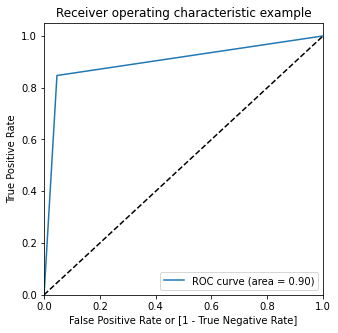

In [110]:
#Let's build prediction Data 
y_train_pred_data = prediction(res30, X_train_sm, y_train)
# Model Evaluation 
model_evaluation(y_train_pred_data.Converted, y_train_pred_data.predicted)
#Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data.predicted, drop_intermediate = False )
draw_roc(y_train_pred_data.Converted, y_train_pred_data.predicted)

In [111]:
best_feature = X_train_sm.copy()

## Model 5

In [112]:
rfe35 = RFE(logreg, n_features_to_select=35)            
rfe35 = rfe35.fit(X_train, y_train)
col35 = X_train.columns[rfe35.support_]
col35

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Last Activity_Olark Chat Conversation',
       'Country_India', 'Country_United States', 'Country_Others',
       'Specialization_Travel and Tourism',
       'How did you hear about X Education_Student of SomeSchool',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'What is your current occupation_Other',
       'What is your current occupation_Others',
       'Tags_Will revert after reading the email', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Others', 'Lead Profile_Potential Lead',
       'Last Notable Activity_Modified', 'Last Notable Activity_Em

In [113]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col35])
logm35 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res35 = logm35.fit()
res35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7356
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.7
Date:                Sun, 15 Oct 2023   Deviance:                       3171.5
Time:                        14:39:46   Pearson chi2:                 9.99e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5936
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -2.3540      0.205    -11.468      0.000      -2.756      -1.952
TotalVisits                                                                 6.6916      2.007      3.334      0.001       2.757      10.626
Total Time Spent on Website                                                 4.5024      0.226     19.960      0.000       4.060       4.944
Page Views Per Visit                                                       -3.9421      1.663     -2.370      0.018      -7.202      -0.682
Asymmetrique Activity Score                                                 0.7458      0.195      3.817      0.000       0.363       1.129
Lead Origin_Lead Add Form                                                   1.2371      0.261      4.746      0.000       0.726       1.748
Lead Origin_Others                                                         -1.3824      0.651     -2.122      0.034      -2.659      -0.106
Last Activity_Email Opened                                                  0.7246      0.227      3.190      0.001       0.279       1.170
Last Activity_SMS Sent                                                      1.2830      0.215      5.961      0.000       0.861       1.705
Last Activity_Olark Chat Conversation                                      -0.8931      0.231     -3.859      0.000      -1.347      -0.439
Country_India                                                              -0.9781      0.163     -6.002      0.000      -1.298      -0.659
Country_United States                                                      -1.4784      0.619     -2.390      0.017      -2.691      -0.266
Country_Others                                                             -1.3190      0.346     -3.816      0.000      -1.997      -0.642
Specialization_Travel and Tourism                                          -0.7155      0.354     -2.019      0.044      -1.410      -0.021
How did you hear about X Education_Student of SomeSchool                    0.4519      0.244      1.851      0.064      -0.027       0.930
What is your current occupation_Unemployed                                  2.0165      0.135     14.950      0.000       1.752       2.281
What is your current occupation_Working Professional                        2.5699      0.314      8.177      0.000       1.954       3.186
What is your current occupation_Student                                     1.8264      0.475      3.845      0.000       0.895       2.757
What is your current occupation_Other                                       1.1166      1.163      0.960      0.337      -1.162       3.395
Wha

In [114]:
X_train_sm = X_train_sm.drop(['What is your current occupation_Other','What matters most to you in choosing a course_Flexibility & Convenience',
                             'How did you hear about X Education_Student of SomeSchool'], axis=1, errors="ignore")
logm35 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res35 = logm35.fit()    
res35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7359
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.3
Date:                Sun, 15 Oct 2023   Deviance:                       3178.6
Time:                        14:39:46   Pearson chi2:                 1.02e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5933
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3356      0.205    -11.406      0.000      -2.737      -1.934
TotalVisits                                              6.7131      2.017      3.328      0.001       2.759      10.667
Total Time Spent on Website                              4.5009      0.225     19.981      0.000       4.059       4.942
Page Views Per Visit                                    -3.8124      1.654     -2.305      0.021      -7.055      -0.570
Asymmetrique Activity Score                              0.7332      0.195      3.763      0.000       0.351       1.115
Lead Origin_Lead Add Form                                1.2363      0.260      4.756      0.000       0.727       1.746
Lead Origin_Others                                      -1.3902      0.652     -2.132      0.033      -2.669      -0.112
Last Activity_Email Opened                               0.7484      0.226      3.306      0.001       0.305       1.192
Last Activity_SMS Sent                                   1.2816      0.215      5.955      0.000       0.860       1.703
Last Activity_Olark Chat Conversation                   -0.8983      0.231     -3.883      0.000      -1.352      -0.445
Country_India                                           -0.9746      0.162     -6.013      0.000      -1.292      -0.657
Country_United States                                   -1.4978      0.619     -2.418      0.016      -2.712      -0.284
Country_Others                                          -1.3350      0.345     -3.870      0.000      -2.011      -0.659
Specialization_Travel and Tourism                       -0.7484      0.355     -2.109      0.035      -1.444      -0.053
What is your current occupation_Unemployed               1.9965      0.133     14.979      0.000       1.735       2.258
What is your current occupation_Working Professional     2.5392      0.314      8.078      0.000       1.923       3.155
What is your current occupation_Student                  1.8026      0.478      3.775      0.000       0.867       2.739
What is your current occupation_Others                  21.3888   1.39e+04      0.002      0.999   -2.73e+04    2.74e+04
Tags_Will revert after reading the email                 2.5437      0.205     12.424      0.000       2.142       2.945
Tags_Ringing                                            -4.6438      0.244    -19.060      0.000      -5.121      -4.166
Tags_Interested in other courses                        -3.6378      0.368     -9.878      0.000      -4.360      -2.916
Tags_Already a student                                  -4.4134      0.614     -7.185      0.000      -5.617      -3.209
Tags_Closed by Horizzon                                  3

In [115]:
#Let's check the VIFs 
vif(X_train_sm)

,Features,VIF
25,Last Notable Activity_Email Opened,9.40
13,What is your current occupation_Unemployed,8.76
6,Last Activity_Email Opened,8.41
9,Country_India,7.72
26,Last Notable Activity_SMS Sent,7.67
7,Last Activity_SMS Sent,6.81
3,Asymmetrique Activity Score,6.11
30,Asymmetrique Activity Index_02.Medium,5.40
17,Tags_Will revert after reading the email,4.38
24,Last Notable Activity_Modified,4.04


Confusion Matrix:
 [[4363  209]
 [ 395 2425]]
ROC-AUC score  test dataset: 0.9071080210718341
precision score  test dataset: 0.9206529992406985
Recall score  test dataset: 0.8599290780141844
f1 score  test dataset : 0.8892555922258893


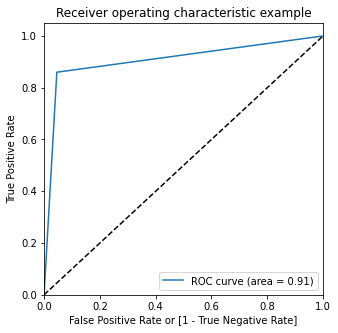

In [116]:
#Let's build prediction Data 
y_train_pred_data = prediction(res35, X_train_sm, y_train)
# Model Evaluation 
model_evaluation(y_train_pred_data.Converted, y_train_pred_data.predicted)
#Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data.predicted, drop_intermediate = False )
draw_roc(y_train_pred_data.Converted, y_train_pred_data.predicted)

In [117]:
X_train_sm = X_train_sm.drop(['Last Notable Activity_Email Opened','What is your current occupation_Unemployed',
                             'What is your current occupation_Student','Tags_Others','Lead Origin_Others','Country_India'
                             ,'Country_United States','Specialization_Travel and Tourism','Country_Others','Last Activity_SMS Sent'], axis=1, errors="ignore")
logm35 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res35 = logm35.fit()    
res35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7369
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1753.4
Date:                Sun, 15 Oct 2023   Deviance:                       3506.9
Time:                        14:39:48   Pearson chi2:                 1.16e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5748
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1265      0.157    -13.579      0.000      -2.433      -1.820
TotalVisits                                              5.7636      1.816      3.173      0.002       2.204       9.323
Total Time Spent on Website                              3.9601      0.194     20.384      0.000       3.579       4.341
Page Views Per Visit                                    -9.8860      1.464     -6.753      0.000     -12.755      -7.017
Asymmetrique Activity Score                              0.8223      0.176      4.684      0.000       0.478       1.166
Lead Origin_Lead Add Form                                2.5106      0.235     10.662      0.000       2.049       2.972
Last Activity_Email Opened                               0.2598      0.133      1.950      0.051      -0.001       0.521
Last Activity_Olark Chat Conversation                   -0.9621      0.205     -4.682      0.000      -1.365      -0.559
What is your current occupation_Working Professional     0.7793      0.288      2.704      0.007       0.214       1.344
What is your current occupation_Others                  19.1462   1.38e+04      0.001      0.999   -2.69e+04     2.7e+04
Tags_Will revert after reading the email                 3.7151      0.174     21.381      0.000       3.375       4.056
Tags_Ringing                                            -3.3992      0.222    -15.295      0.000      -3.835      -2.964
Tags_Interested in other courses                        -2.2970      0.347     -6.624      0.000      -2.977      -1.617
Tags_Already a student                                  -3.1529      0.602     -5.234      0.000      -4.334      -1.972
Tags_Closed by Horizzon                                  5.0448      0.734      6.871      0.000       3.606       6.484
Lead Profile_Potential Lead                              0.4957      0.177      2.796      0.005       0.148       0.843
Last Notable Activity_Modified                          -0.3800      0.127     -3.000      0.003      -0.628      -0.132
Last Notable Activity_SMS Sent                           2.0442      0.156     13.120      0.000       1.739       2.350
Lead Quality_High in Relevance                           0.9013      0.369      2.440      0.015       0.177       1.625
Lead Quality_Others                                     -1.3942      0.360     -3.874      0.000      -2.100      -0.689
Do Not Email_Yes                                        -1.2539      0.200     -6.283      0.000      -1.645      -0.863
Asymmetrique Activity Index_02.Medium                   -0.4911      0.145     -3.399      0.001      -0.774      -0.208
Asymmetrique Activity Index_03.Low                      -1

In [118]:
#Let's check the VIFs 
vif(X_train_sm)

,Features,VIF
3,Asymmetrique Activity Score,6.04
20,Asymmetrique Activity Index_02.Medium,5.21
2,Page Views Per Visit,3.24
9,Tags_Will revert after reading the email,2.48
1,Total Time Spent on Website,2.20
15,Last Notable Activity_Modified,2.06
0,TotalVisits,2.02
5,Last Activity_Email Opened,1.87
14,Lead Profile_Potential Lead,1.86
16,Last Notable Activity_SMS Sent,1.82


Confusion Matrix:
 [[4333  239]
 [ 470 2350]]
ROC-AUC score  test dataset: 0.8905293088363955
precision score  test dataset: 0.9076863653920433
Recall score  test dataset: 0.8333333333333334
f1 score  test dataset : 0.8689221667591052


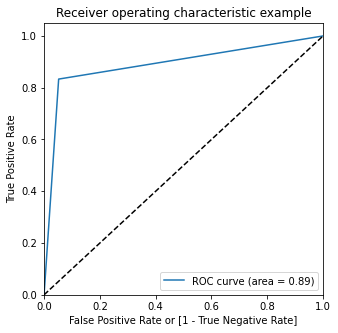

In [119]:
#Let's build prediction Data 
y_train_pred_data = prediction(res35, X_train_sm, y_train)
# Model Evaluation 
model_evaluation(y_train_pred_data.Converted, y_train_pred_data.predicted)
#Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data.predicted, drop_intermediate = False )
draw_roc(y_train_pred_data.Converted, y_train_pred_data.predicted)

# Final Model

## Best Features from Model4

In [120]:
best_feature_df = best_feature.copy()
best_feature_df.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_Student',
       'Tags_Will revert after reading the email', 'Tags_Ringing',
       'Tags_Interested in other courses', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Others',
       'Last Notable Activity_Modified', 'Lead Quality_High in Relevance',
       'Lead Quality_Others', 'Do Not Email_Yes',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

## Model Building

In [121]:
logm_best = sm.GLM(y_train, best_feature_df, family = sm.families.Binomial())
res_best = logm_best.fit()    
res_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7370
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1639.8
Date:                Sun, 15 Oct 2023   Deviance:                       3279.5
Time:                        14:39:48   Pearson chi2:                 9.85e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5647      0.164    -15.627      0.000      -2.886      -2.243
TotalVisits                                              5.5689      1.876      2.969      0.003       1.893       9.245
Total Time Spent on Website                              3.9528      0.203     19.518      0.000       3.556       4.350
Page Views Per Visit                                    -9.4298      1.502     -6.279      0.000     -12.373      -6.487
Lead Origin_Lead Add Form                                1.6564      0.247      6.696      0.000       1.172       2.141
Last Activity_Email Opened                               0.3076      0.146      2.106      0.035       0.021       0.594
Last Activity_SMS Sent                                   1.7240      0.143     12.083      0.000       1.444       2.004
Last Activity_Olark Chat Conversation                   -0.4576      0.222     -2.064      0.039      -0.892      -0.023
What is your current occupation_Unemployed               1.9975      0.128     15.547      0.000       1.746       2.249
What is your current occupation_Working Professional     2.5943      0.305      8.499      0.000       1.996       3.193
What is your current occupation_Student                  1.8416      0.469      3.923      0.000       0.922       2.762
Tags_Will revert after reading the email                 2.6459      0.192     13.747      0.000       2.269       3.023
Tags_Ringing                                            -4.5591      0.236    -19.340      0.000      -5.021      -4.097
Tags_Interested in other courses                        -3.5674      0.359     -9.934      0.000      -4.271      -2.864
Tags_Already a student                                  -4.3408      0.608     -7.137      0.000      -5.533      -3.149
Tags_Closed by Horizzon                                  4.1220      0.736      5.602      0.000       2.680       5.564
Tags_Others                                             -1.2641      0.141     -8.972      0.000      -1.540      -0.988
Last Notable Activity_Modified                          -0.7409      0.110     -6.709      0.000      -0.957      -0.524
Lead Quality_High in Relevance                           1.0688      0.362      2.955      0.003       0.360       1.778
Lead Quality_Others                                     -1.5287      0.370     -4.135      0.000      -2.253      -0.804
Do Not Email_Yes                                        -1.3782      0.210     -6.571      0.000      -1.789      -0.967
Asymmetrique Activity Index_03.Low                      -1.7120      0.317     -5.405      0.000      -2.333      -1.091
==========================================================

In [122]:
#Let's check the VIFs 
vif(best_feature_df)

,Features,VIF
7,What is your current occupation_Unemployed,8.26
10,Tags_Will revert after reading the email,4.01
2,Page Views Per Visit,3.27
15,Tags_Others,2.57
11,Tags_Ringing,2.53
8,What is your current occupation_Working Profes...,2.36
1,Total Time Spent on Website,2.22
13,Tags_Already a student,2.12
0,TotalVisits,2.01
5,Last Activity_SMS Sent,1.99


### Checking Model performantion on Known Data (Train Data)  

In [123]:
#Let's build prediction Data 
y_train_pred = res_best.predict(best_feature_df)
y_train_pred = y_train_pred.values.reshape(-1)
 
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_data = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_data['Lead Number'] = y_train.index
y_train_pred_data.head()

,Converted,Converted_Prob,Lead Number
0,0,0.009348,600123
1,0,0.022682,614204
2,0,0.002367,617857
3,1,0.995311,644758
4,0,0.007208,607605


## Finding Optimal Cutoff Point

   Converted  Converted_Prob  Lead Number  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.009348       600123    1    0    0    0    0    0    0   
1          0        0.022682       614204    1    0    0    0    0    0    0   
2          0        0.002367       617857    1    0    0    0    0    0    0   
3          1        0.995311       644758    1    1    1    1    1    1    1   
4          0        0.007208       607605    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    0    0    0  
     prob  accuracy     sensi     speci
0.0   0.0  0.381494  1.000000  0.000000
0.1   0.1  0.822376  0.963830  0.735127
0.2   0.2  0.886364  0.935461  0.856080
0.3   0.3  0.907332  0.920922  0.898950
0.4   0.4  0.913285  0.890071  0.927603
0.5   0.5  0.913149  0.847163  0.953850
0.6   0.6  0.911661  0.819504  0.968504
0.7   0.7  0.907603  0.796454  0.976159
0.8   0.8  0.890152  0.740071  0.982721
0.9  

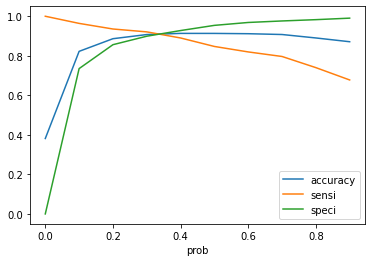

In [124]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_data[i]= y_train_pred_data.Converted_Prob.map(lambda x: 1 if x > i else 0)
print(y_train_pred_data.head())

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_data.Converted, y_train_pred_data[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Model Evaluation 

In [125]:
#model_evaluation(y_train_pred_data.Converted, y_train_pred_data[0.3])
cnf_matrix = metrics.confusion_matrix(y_train_pred_data.Converted, y_train_pred_data[0.3])
#cnf_matrix

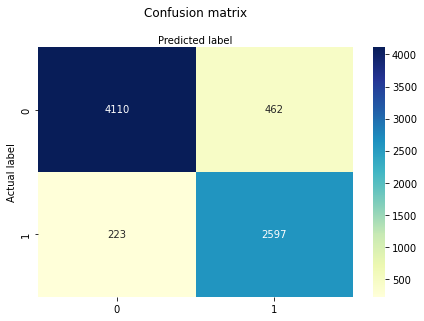

In [126]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [127]:
target_names = ['without Converted', 'Converted']
print(classification_report(y_train_pred_data.Converted, y_train_pred_data[0.3], target_names=target_names))

                   precision    recall  f1-score   support

without Converted       0.95      0.90      0.92      4572
        Converted       0.85      0.92      0.88      2820

         accuracy                           0.91      7392
        macro avg       0.90      0.91      0.90      7392
     weighted avg       0.91      0.91      0.91      7392



### Plotting the ROC Curve

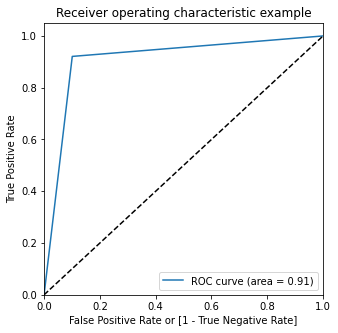

In [128]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_data.Converted, y_train_pred_data[0.3], drop_intermediate = False )
draw_roc(y_train_pred_data.Converted, y_train_pred_data[0.3])

# Prediction on Test Dataset

## Scaling

In [129]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Email Opened,Last Activity_SMS Sent,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Others,Country_India,Country_United States,Country_Others,City_Mumbai,City_Thane & Outskirts,City_Others,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Business Administration,Specialization_IT Projects Management,Specialization_Supply Chain Management,"Specialization_Banking, Investment And Insurance",Specialization_Travel and Tourism,Specialization_Others,How did you hear about X Education_Online Search,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Other,How did you hear about X Education_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_Student,What is your current occupation_Other,What is your current occupation_Others,Tags_Will revert after reading the email,Tags_Ringing,Tags_Interested in other courses,Tags_Already a student,Tags_Closed by Horizzon,Tags_Others,Lead Profile_Potential Lead,Lead Profile_Other Leads,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,Last Notable Activity_Page Visited on Website,Last Notable Activity_Others,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_High in Relevance,Lead Quality_Others,Do Not Email_Yes,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
615582,0.031873,0.110915,0.048545,0.000000,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
588939,0.007968,0.408891,0.036364,0.777778,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
621242,0.003984,0.000880,0.018182,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
589803,0.007968,0.142165,0.036364,0.777778,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
651441,0.011952,0.088468,0.054545,0.722222,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Prediction & Model Evaluation on Test Dataset

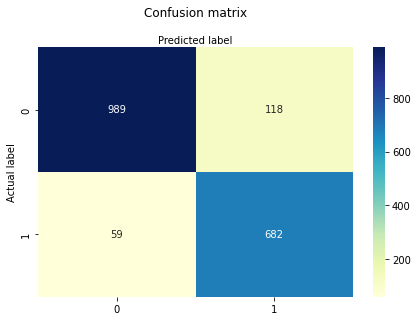

                   precision    recall  f1-score   support

without Converted       0.94      0.89      0.92      1107
        Converted       0.85      0.92      0.89       741

         accuracy                           0.90      1848
        macro avg       0.90      0.91      0.90      1848
     weighted avg       0.91      0.90      0.90      1848



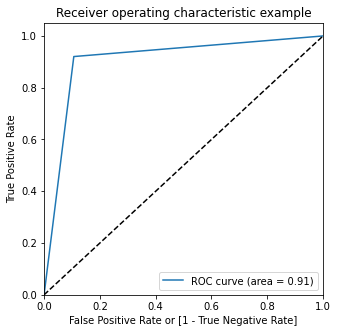

In [130]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[best_feature_df.columns]

#Let's build prediction Data 
y_test_pred_data = prediction(res_best, X_test_sm, y_test, threshold=0.3)
# Model Evaluation 
cnf_matrix = metrics.confusion_matrix(y_test_pred_data.Converted, y_test_pred_data.predicted)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Accuracy

target_names = ['without Converted', 'Converted']
print(classification_report(y_test_pred_data.Converted, y_test_pred_data.predicted, target_names=target_names))

#Plotting the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_data.Converted, y_test_pred_data.predicted, drop_intermediate = False )
draw_roc(y_test_pred_data.Converted, y_test_pred_data.predicted)


# Final Result

In [131]:
pd.merge(y_test_pred_data, ref_id, on="Lead Number", how='inner')

,Converted,Converted_Prob,Lead Number,predicted,Prospect ID
0,1,0.982373,615582,1,8b94b8c4-7107-4c12-8a66-531d0ed974c4
1,0,0.033373,588939,0,a4c0a4e4-c5d8-4e48-8a4f-030611dde534
2,0,0.047973,621242,0,889c23c8-84d0-4936-97ad-7b438dc2e2d7
3,0,0.018734,589803,0,85dfdbea-fb6c-4428-a59c-59155bedea4a
4,0,0.086656,651441,0,cbc292d8-752f-47ea-92c6-07d4247638d5
...,...,...,...,...,...
1843,1,0.996289,592785,1,3678a8d3-1719-4c0d-a441-a5f7553ac8fd
1844,1,0.062464,630603,0,0033009e-57b0-46c7-b84d-2027ce70f1cd
1845,0,0.003340,654192,0,6be74452-525d-11e6-96be-22000aa8e760
1846,1,0.924206,619497,1,bcace936-2436-4a74-ac45-60ba6f1d1f36
